<a href="https://colab.research.google.com/github/AdiraMartin/Hartford_incidents_analysis/blob/main/Adira_Finpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Police Incidents Analysis in Hartford, Connecticut
***
> ### Story Line

As data analysts hired by the Hartford Police Department and Law Agency, our team embarked on a research project to investigate the incidents occurring in Hartford, Connecticut. The objective of this project was to uncover patterns and trends in incidents data, with the aim of assisting law enforcement agencies in their efforts to enhance public safety and allocate resources effectively.<br>

The city of Hartford, as the capital of Connecticut, faces various challenges related to crime and public safety. By delving into the incidents data, our team sought to gain a deeper understanding of the underlying patterns driving these incidents. This research project aimed to uncover actionable insights that would contribute to informed decision-making and aid in the development of proactive strategies to combat crime.

## Import Libraries

In [ ]:
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introducing Data

The main dataset used for analysis is "Police_Incidents_05192021_to_Current," which is provided by https://data.hartford.gov/. It consists of incident data from May 19, 2021, to June 9, 2023 (when this data was downloaded). This dataset contains information about police incidents in Hartford, Connecticut, USA. Below is the columns information:<Br>
    1. CaseNum : A unique identifier or reference number assigned to each individual crime case.<Br>
    2. Date : The date when the incident occured.<Br>
    3. Time : The time when the incident occured <Br>
    4. NibrsCode : A code representing a specific type or category of crime according to NIBRS (National Incident-Based Reporting System) standards.<Br>
    5. NibrsDesc : A description corresponding to the NIBRS code, proving details about the type or category of incidents.<Br>
    6. OffenseDesc : A description of the incidents itself<Br>
    7. Address: The address or location where the crime occurred.<Br>








Link Dataset :
Main Data : https://data.hartford.gov/Public-Safety/Police-Incidents-05192021-to-Current/w8n8-xfuk

In [ ]:
!gdown --id 19Xn6anDrijp7DLArNK80GYQ3NjD5Pr5I

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19Xn6anDrijp7DLArNK80GYQ3NjD5Pr5I
To: /content/Police_Incidents_05192021_to_Current.csv
100% 7.38M/7.38M [00:00<00:00, 65.8MB/s]


In [ ]:
df = pd.read_csv('Police_Incidents_05192021_to_Current.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76364 entries, 0 to 76363
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CaseNum      76361 non-null  object
 1   Date         76364 non-null  object
 2   Time         76364 non-null  int64 
 3   NibrsCode    76364 non-null  object
 4   NibrsDesc    76364 non-null  object
 5   OffenseDesc  76364 non-null  object
 6   Address      76342 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.1+ MB


In [ ]:
df

CaseNum        Date  Time NibrsCode  \
0      21-031644  11/08/2021  1946      9999   
1      21-017029  06/12/2021  1521       520   
2       21-14757  05/19/2021  1630       23F   
3      21-019332  07/06/2021  1550      9999   
4      21-023825  08/19/2021  1736      9999   
...          ...         ...   ...       ...   
76359  23-006195  03/06/2023  1820       13A   
76360  23-014503  05/29/2023  1536       290   
76361  23-014513  05/29/2023  1711      9999   
76362  23-014499  05/29/2023  1435      9999   
76363  23-014553  05/29/2023  2351       240   

                                      NibrsDesc  \
0                          NOT NIBRS REPORTABLE   
1                         WEAPON LAW VIOLATIONS   
2                      THEFT FROM MOTOR VEHICLE   
3                          NOT NIBRS REPORTABLE   
4                          NOT NIBRS REPORTABLE   
...                                         ...   
76359                        AGGRAVATED ASSAULT   
76360  DESTRUCTIVE/DAMAGE/VANDALISM OF PROPERTY   
76361                      NOT NIBRS REPORTABLE   
76362                      NOT NIBRS REPORTABLE   
76363                       MOTOR VEHICLE THEFT   

                                  OffenseDesc              Address  
0        14-150(A) ABANDONING A MOTOR VEHICLE     342 SIGOURNEY ST  
1             53-203 ILL DISCHARGE OF FIREARM        136 MARTIN ST  
2                     53A-124 LARCENY 3RD DEG        126 KENYON ST  
3       14-12(A)* OPERATE/TOW UNREGISTERED MV       10 MARSHALL ST  
4      14-213B ILL OPN MV WO MINIMUM INSURNCE  217 WETHERSFIELD AV  
...                                       ...                  ...  
76359                  53A-60 ASSAULT 2ND DEG          634 PARK ST  
76360       53A-116 CRIMINAL MISCHIEF 2ND DEG        188 BEACON ST  
76361                         9999 NO OFFENSE         46 FRASER PL  
76362                         9999 NO OFFENSE       10 WOODLAND ST  
76363       PA22-115 THEFT OF A MOTOR VEHICLE       10 COLUMBIA ST  

[76364 rows x 7 columns]

### Additional  Data

Moreover, there is additional data provided, namely "Police_Incidents_01012005_to_05182021.csv," which is utilized to facilitate geocoding and enhance the analysis process by adding neighborhood information.

Link dataset : https://data.hartford.gov/Public-Safety/Police-Incidents-01012005-to-05182021/889t-nwfu

In [ ]:
!gdown --id 1RVSLgI6jldQVmTIJNGSJNJ7FDxOSBvVj

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RVSLgI6jldQVmTIJNGSJNJ7FDxOSBvVj
To: /content/Police_Incidents_01012005_to_05182021.csv
100% 117M/117M [00:00<00:00, 145MB/s]


In [ ]:
incidents_2021 = pd.read_csv('Police_Incidents_01012005_to_05182021.csv')
incidents_2021

Case_Number        Date  Time_24HR                     Address  \
0          21013791  05/10/2021       1641               403 GARDEN ST   
1          21014071  05/13/2021        245             59 ELLINGTON ST   
2          20036741  11/29/2020       1703                 267 ZION ST   
3          21013679  05/09/2021       2245  HOMESTEAD AV & WOODLAND ST   
4          21014070  05/13/2021        240      BENTON ST & WEBSTER ST   
...             ...         ...        ...                         ...   
708980      9000978  01/09/2009        955                 219 ZION ST   
708981     13014833  05/07/2013       1139                 150 WARD ST   
708982      6011544  03/18/2006       1155             334 FRANKLIN AV   
708983     12033004  09/19/2012       1206    ASHLEY ST & SIGOURNEY ST   
708984      7048492  11/24/2007        630                 94 HENRY ST   

                         UCR_1_Category    UCR_1_Description  UCR_1_Code  \
0        32* - PROPERTY DAMAGE ACCIDENT         PROP DAM ACC        3221   
1        32* - PROPERTY DAMAGE ACCIDENT         PROP DAM ACC        3261   
2        31* - PERSONAL INJURY ACCIDENT         PERS INJ ACC        3124   
3        31* - PERSONAL INJURY ACCIDENT         PERS INJ ACC        3124   
4        32* - PROPERTY DAMAGE ACCIDENT         PROP DAM ACC        3221   
...                                 ...                  ...         ...   
708980             34* - OTHER ACCIDENT  HAZARDOUS CONDITION        3490   
708981         24* - MOTOR VEHICLE LAWS         OP UNREG M/V        2414   
708982   32* - PROPERTY DAMAGE ACCIDENT         PROP DAM ACC        3224   
708983           39* - ANIMAL COMPLAINT          ANIMAL BITE        3904   
708984  19* - CRIMES AGAINST THE PUBLIC          DIS-CONDUCT        1902   

                         UCR_2_Category   UCR_2_Description  UCR_2_Code  \
0                                   NaN                 NaN           0   
1              24* - MOTOR VEHICLE LAWS        EVADING RESP        2401   
2                    23* - DRIVING LAWS      FOLL TOO CLOSE        2334   
3                    23* - DRIVING LAWS  TRAVELING TOO FAST        2327   
4                                   NaN                 NaN           0   
...                                 ...                 ...         ...   
708980                              NaN                 NaN           0   
708981         24* - MOTOR VEHICLE LAWS       TOWED VEHICLE        2430   
708982               23* - DRIVING LAWS   IMPRP LANE CHANGE        2344   
708983                              NaN                 NaN           0   
708984  19* - CRIMES AGAINST THE PUBLIC            DOMESTIC        1904   

            Neighborhood                                      geom  
0           CLAY-ARSENAL  (41.780238042803745, -72.68497435174203)  
1       BEHIND THE ROCKS   (41.74625648731947, -72.70484012171347)  
2       BEHIND THE ROCKS   (41.74850755091766, -72.69411393999614)  
3           UPPER ALBANY  (41.778689832211015, -72.69776621329845)  
4           BARRY SQUARE   (41.74653366174123, -72.68316706252509)  
...                  ...                                       ...  
708980  BEHIND THE ROCKS  (41.747163627033345, -72.69420967955826)  
708981       FROG HOLLOW   (41.75622433710221, -72.68959981062677)  
708982          SOUTHEND   (41.74104529114852, -72.67573171674711)  
708983       ASYLUM HILL  (41.774504796809694, -72.69245815646983)  
708984      BARRY SQUARE   (41.74064847726594, -72.68872572654666)  

[708985 rows x 12 columns]

In [ ]:
incidents_2021[['Number', 'Street']] = incidents_2021['Address'].apply(lambda x: pd.Series([x.split()[0], ' '.join(x.split()[1:])] if isinstance(x, str) else [x, x]))

###  Adding neighborhood and geographical point data to the main dataset based on main dataset.

The code below takes approximately 45 minutes to match addresses and obtain their corresponding neighborhoods and point geometry. To simplify future work, I'm saving the results in CSV format.

In [ ]:
# for address in df['Address']:
#     if address in incidents_2021['Address'].values:
#         matching_row = incidents_2021[incidents_2021['Address'] == address]

#         neighborhood = matching_row['Neighborhood'].values[0]
#         geometry = matching_row['geom'].values[0]

#         df.loc[df['Address'] == address, 'Neighborhood'] = neighborhood
#         df.loc[df['Address'] == address, 'Geometry' ] = geometry

In [ ]:
# Save to csv
# incidents.to_csv('Police_Incidents_With_Neighborhood.csv', index=False)

In [ ]:
# incidents

## Import FInal Data

In [ ]:
!gdown --id 1-HjJHcYhQwOzh94rBqmQyQp7gNvJU-gG

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-HjJHcYhQwOzh94rBqmQyQp7gNvJU-gG
To: /content/Police_Incidents_With_Neighborhood.csv
100% 11.0M/11.0M [00:00<00:00, 74.3MB/s]


In [ ]:
data = pd.read_csv('Police_Incidents_With_Neighborhood.csv')
data

CaseNum        Date  Time NibrsCode  \
0      21-031644  11/08/2021  1946      9999   
1      21-017029  06/12/2021  1521       520   
2       21-14757  05/19/2021  1630       23F   
3      21-019332  07/06/2021  1550      9999   
4      21-023825  08/19/2021  1736      9999   
...          ...         ...   ...       ...   
75570  23-006195  03/06/2023  1820       13A   
75571  23-014503  05/29/2023  1536       290   
75572  23-014513  05/29/2023  1711      9999   
75573  23-014499  05/29/2023  1435      9999   
75574  23-014553  05/29/2023  2351       240   

                                      NibrsDesc  \
0                          NOT NIBRS REPORTABLE   
1                         WEAPON LAW VIOLATIONS   
2                      THEFT FROM MOTOR VEHICLE   
3                          NOT NIBRS REPORTABLE   
4                          NOT NIBRS REPORTABLE   
...                                         ...   
75570                        AGGRAVATED ASSAULT   
75571  DESTRUCTIVE/DAMAGE/VANDALISM OF PROPERTY   
75572                      NOT NIBRS REPORTABLE   
75573                      NOT NIBRS REPORTABLE   
75574                       MOTOR VEHICLE THEFT   

                                  OffenseDesc              Address  \
0        14-150(A) ABANDONING A MOTOR VEHICLE     342 SIGOURNEY ST   
1             53-203 ILL DISCHARGE OF FIREARM        136 MARTIN ST   
2                     53A-124 LARCENY 3RD DEG        126 KENYON ST   
3       14-12(A)* OPERATE/TOW UNREGISTERED MV       10 MARSHALL ST   
4      14-213B ILL OPN MV WO MINIMUM INSURNCE  217 WETHERSFIELD AV   
...                                       ...                  ...   
75570                  53A-60 ASSAULT 2ND DEG          634 PARK ST   
75571       53A-116 CRIMINAL MISCHIEF 2ND DEG        188 BEACON ST   
75572                         9999 NO OFFENSE         46 FRASER PL   
75573                         9999 NO OFFENSE       10 WOODLAND ST   
75574       PA22-115 THEFT OF A MOTOR VEHICLE       10 COLUMBIA ST   

       Neighborhood                                  Geometry  
0      UPPER ALBANY   (41.77709143718237, -72.69121507084644)  
1         NORTHEAST   (41.78957192124576, -72.67973889192693)  
2           WESTEND  (41.770770000171076, -72.71016999967199)  
3       ASYLUM HILL  (41.768573311011885, -72.69822853450444)  
4      BARRY SQUARE    (41.7498038232749, -72.67406228357933)  
...             ...                                       ...  
75570   FROG HOLLOW   (41.75817426762926, -72.68735255936974)  
75571       WESTEND   (41.76407082384591, -72.71436353667885)  
75572   ASYLUM HILL   (41.77356005596578, -72.68595408913966)  
75573   ASYLUM HILL   (41.76799770600936, -72.70209672608517)  
75574   FROG HOLLOW   (41.76317439471867, -72.69130644859251)  

[75575 rows x 9 columns]

In [ ]:
incidents = data.copy()

Always used a copy data

### Handling Missing Value on Neighborhood and Geometry

Of course, there are some missing values for neighborhood and geometry data because they are not present in the previous data. So, I'm trying to separate the number and street name, at least their locations are not too far apart but still within the same street.

In [ ]:
# split number and street addess as new columns
def extract_number_and_street(address):
  """
  input: address
  output: .....
  """
    # this code for .....
  if pd.notnull(address):
        if '&' in address:
            number, street = address.split('&', 1)
            return number.strip(), street.translate(str.maketrans('', '', string.punctuation)).strip()
        elif '@' in address:
            number, street = address.split('@', 1)
            return number.strip(), street.translate(str.maketrans('', '', string.punctuation)).strip()
        elif ' ' in address:
            number, street = address.split(' ', 1)
            return number.strip(), street.translate(str.maketrans('', '', string.punctuation)).strip()

  return address, address

In [ ]:
incidents[['Number', 'Street']] = incidents['Address'].apply(extract_number_and_street).apply(pd.Series)

In [ ]:
incidents

CaseNum        Date  Time NibrsCode  \
0      21-031644  11/08/2021  1946      9999   
1      21-017029  06/12/2021  1521       520   
2       21-14757  05/19/2021  1630       23F   
3      21-019332  07/06/2021  1550      9999   
4      21-023825  08/19/2021  1736      9999   
...          ...         ...   ...       ...   
75570  23-006195  03/06/2023  1820       13A   
75571  23-014503  05/29/2023  1536       290   
75572  23-014513  05/29/2023  1711      9999   
75573  23-014499  05/29/2023  1435      9999   
75574  23-014553  05/29/2023  2351       240   

                                      NibrsDesc  \
0                          NOT NIBRS REPORTABLE   
1                         WEAPON LAW VIOLATIONS   
2                      THEFT FROM MOTOR VEHICLE   
3                          NOT NIBRS REPORTABLE   
4                          NOT NIBRS REPORTABLE   
...                                         ...   
75570                        AGGRAVATED ASSAULT   
75571  DESTRUCTIVE/DAMAGE/VANDALISM OF PROPERTY   
75572                      NOT NIBRS REPORTABLE   
75573                      NOT NIBRS REPORTABLE   
75574                       MOTOR VEHICLE THEFT   

                                  OffenseDesc              Address  \
0        14-150(A) ABANDONING A MOTOR VEHICLE     342 SIGOURNEY ST   
1             53-203 ILL DISCHARGE OF FIREARM        136 MARTIN ST   
2                     53A-124 LARCENY 3RD DEG        126 KENYON ST   
3       14-12(A)* OPERATE/TOW UNREGISTERED MV       10 MARSHALL ST   
4      14-213B ILL OPN MV WO MINIMUM INSURNCE  217 WETHERSFIELD AV   
...                                       ...                  ...   
75570                  53A-60 ASSAULT 2ND DEG          634 PARK ST   
75571       53A-116 CRIMINAL MISCHIEF 2ND DEG        188 BEACON ST   
75572                         9999 NO OFFENSE         46 FRASER PL   
75573                         9999 NO OFFENSE       10 WOODLAND ST   
75574       PA22-115 THEFT OF A MOTOR VEHICLE       10 COLUMBIA ST   

       Neighborhood                                  Geometry Number  \
0      UPPER ALBANY   (41.77709143718237, -72.69121507084644)    342   
1         NORTHEAST   (41.78957192124576, -72.67973889192693)    136   
2           WESTEND  (41.770770000171076, -72.71016999967199)    126   
3       ASYLUM HILL  (41.768573311011885, -72.69822853450444)     10   
4      BARRY SQUARE    (41.7498038232749, -72.67406228357933)    217   
...             ...                                       ...    ...   
75570   FROG HOLLOW   (41.75817426762926, -72.68735255936974)    634   
75571       WESTEND   (41.76407082384591, -72.71436353667885)    188   
75572   ASYLUM HILL   (41.77356005596578, -72.68595408913966)     46   
75573   ASYLUM HILL   (41.76799770600936, -72.70209672608517)     10   
75574   FROG HOLLOW   (41.76317439471867, -72.69130644859251)     10   

                Street  
0         SIGOURNEY ST  
1            MARTIN ST  
2            KENYON ST  
3          MARSHALL ST  
4      WETHERSFIELD AV  
...                ...  
75570          PARK ST  
75571        BEACON ST  
75572        FRASER PL  
75573      WOODLAND ST  
75574      COLUMBIA ST  

[75575 rows x 11 columns]

In [ ]:
null_neighborhood = incidents[incidents['Neighborhood'].isnull()].copy()

In [ ]:
null_neighborhood = null_neighborhood.reset_index(drop=True)
null_neighborhood

CaseNum        Date  Time NibrsCode  \
0     21-027687  09/29/2021   902      9999   
1     21-020247  07/15/2021  2109       90D   
2     22-001382  01/16/2022  1201       290   
3     21-025346  09/04/2021    38       240   
4     22-002393  01/27/2022   330      9999   
...         ...         ...   ...       ...   
8294  23-014474  05/29/2023   738       23H   
8295  23-014466  05/29/2023   446       200   
8296  23-014457  05/29/2023   107      9999   
8297  23-014457  05/29/2023   107      9999   
8298  23-014528  05/29/2023  1901       240   

                                     NibrsDesc  \
0                         NOT NIBRS REPORTABLE   
1                  DRIVING UNDER THE INFLUENCE   
2     DESTRUCTIVE/DAMAGE/VANDALISM OF PROPERTY   
3                          MOTOR VEHICLE THEFT   
4                         NOT NIBRS REPORTABLE   
...                                        ...   
8294                         ALL OTHER LARCENY   
8295                                     ARSON   
8296                      NOT NIBRS REPORTABLE   
8297                      NOT NIBRS REPORTABLE   
8298                       MOTOR VEHICLE THEFT   

                                  OffenseDesc  \
0          14-215 ILL OPN MV UNDER SUSPENSION   
1      14-227A ILL OPN MV UNDER INFL ALC/DRUG   
2           53A-117 CRIMINAL MISCHIEF 3RD DEG   
3                     53A-124 LARCENY 3RD DEG   
4                             9999 NO OFFENSE   
...                                       ...   
8294                  53A-123 LARCENY 2ND DEG   
8295                 53A-114 RECKLESS BURNING   
8296    14-12(A)* OPERATE/TOW UNREGISTERED MV   
8297  14-147(C) IMPROPER USE-MARKER/LIC/RGSTR   
8298                  53A-123 LARCENY 2ND DEG   

                               Address Neighborhood Geometry         Number  \
0           WASHINGTON ST & CAPITOL AV          NaN      NaN  WASHINGTON ST   
1                 GARDEN ST & CAPEN ST          NaN      NaN      GARDEN ST   
2                    ZION ST & PARK ST          NaN      NaN        ZION ST   
3            FRANKLIN AV & ADELAIDE ST          NaN      NaN    FRANKLIN AV   
4                  VINE ST & MATHER ST          NaN      NaN        VINE ST   
...                                ...          ...      ...            ...   
8294                 374 SIGOURNEY ST.          NaN      NaN            374   
8295      HUBBARD RD & GOODWIN PARK RD          NaN      NaN     HUBBARD RD   
8296  BROAD STREET @ I-84 EAST ON RAMP          NaN      NaN   BROAD STREET   
8297  BROAD STREET @ I-84 EAST ON RAMP          NaN      NaN   BROAD STREET   
8298           WESTLAND ST & GARDEN ST          NaN      NaN    WESTLAND ST   

                Street  
0           CAPITOL AV  
1             CAPEN ST  
2              PARK ST  
3          ADELAIDE ST  
4            MATHER ST  
...                ...  
8294      SIGOURNEY ST  
8295   GOODWIN PARK RD  
8296  I84 EAST ON RAMP  
8297  I84 EAST ON RAMP  
8298         GARDEN ST  

[8299 rows x 11 columns]

In [ ]:
# Daftar penggantian nama
replacements = {
    'STREET': 'ST',
    'AVENUE': 'AV',
    'ROAD': 'RD',
    'AVENNUE' : 'AV'
}

# Mengganti nama menggunakan metode str.replace()
null_neighborhood['Number'] = null_neighborhood['Number'].str.replace(r'\b(' + '|'.join(replacements.keys()) + r')\b', lambda x: replacements[x.group()], regex=True)
null_neighborhood['Street'] = null_neighborhood['Street'].str.replace(r'\b(' + '|'.join(replacements.keys()) + r')\b', lambda x: replacements[x.group()], regex=True)

In [ ]:
# Match on street
# this code takes about 20 min to run

for street in null_neighborhood['Street']:
    if street in incidents_2021['Street'].values:
        matching_row = incidents_2021[incidents_2021['Street'] == street]
        neighborhood = matching_row['Neighborhood'].values[0]
        geometry = matching_row['geom'].values[0]

        null_neighborhood.loc[null_neighborhood['Street'] == street, 'Neighborhood'] = neighborhood
        null_neighborhood.loc[null_neighborhood['Street'] == street, 'Geometry'] = geometry

In [ ]:
null_neighborhood

CaseNum        Date  Time NibrsCode  \
0     21-027687  09/29/2021   902      9999   
1     21-020247  07/15/2021  2109       90D   
2     22-001382  01/16/2022  1201       290   
3     21-025346  09/04/2021    38       240   
4     22-002393  01/27/2022   330      9999   
...         ...         ...   ...       ...   
8294  23-014474  05/29/2023   738       23H   
8295  23-014466  05/29/2023   446       200   
8296  23-014457  05/29/2023   107      9999   
8297  23-014457  05/29/2023   107      9999   
8298  23-014528  05/29/2023  1901       240   

                                     NibrsDesc  \
0                         NOT NIBRS REPORTABLE   
1                  DRIVING UNDER THE INFLUENCE   
2     DESTRUCTIVE/DAMAGE/VANDALISM OF PROPERTY   
3                          MOTOR VEHICLE THEFT   
4                         NOT NIBRS REPORTABLE   
...                                        ...   
8294                         ALL OTHER LARCENY   
8295                                     ARSON   
8296                      NOT NIBRS REPORTABLE   
8297                      NOT NIBRS REPORTABLE   
8298                       MOTOR VEHICLE THEFT   

                                  OffenseDesc  \
0          14-215 ILL OPN MV UNDER SUSPENSION   
1      14-227A ILL OPN MV UNDER INFL ALC/DRUG   
2           53A-117 CRIMINAL MISCHIEF 3RD DEG   
3                     53A-124 LARCENY 3RD DEG   
4                             9999 NO OFFENSE   
...                                       ...   
8294                  53A-123 LARCENY 2ND DEG   
8295                 53A-114 RECKLESS BURNING   
8296    14-12(A)* OPERATE/TOW UNREGISTERED MV   
8297  14-147(C) IMPROPER USE-MARKER/LIC/RGSTR   
8298                  53A-123 LARCENY 2ND DEG   

                               Address  Neighborhood  \
0           WASHINGTON ST & CAPITOL AV       WESTEND   
1                 GARDEN ST & CAPEN ST     NORTHEAST   
2                    ZION ST & PARK ST     PARKVILLE   
3            FRANKLIN AV & ADELAIDE ST      SOUTHEND   
4                  VINE ST & MATHER ST  UPPER ALBANY   
...                                ...           ...   
8294                 374 SIGOURNEY ST.   ASYLUM HILL   
8295      HUBBARD RD & GOODWIN PARK RD      SOUTHEND   
8296  BROAD STREET @ I-84 EAST ON RAMP           NaN   
8297  BROAD STREET @ I-84 EAST ON RAMP           NaN   
8298           WESTLAND ST & GARDEN ST  CLAY-ARSENAL   

                                      Geometry         Number  \
0      (41.76022976305517, -72.71321404146123)  WASHINGTON ST   
1     (41.785359709551585, -72.67909317191675)      GARDEN ST   
2     (41.757609983121135, -72.70491832630294)        ZION ST   
3     (41.741879708732334, -72.67786353116377)    FRANKLIN AV   
4      (41.78113359119035, -72.68763104474533)        VINE ST   
...                                        ...            ...   
8294  (41.769523033231565, -72.69356839099216)            374   
8295   (41.72214157815562, -72.68044473282788)     HUBBARD RD   
8296                                       NaN       BROAD ST   
8297                                       NaN       BROAD ST   
8298  (41.780238042803745, -72.68497435174203)    WESTLAND ST   

                Street  
0           CAPITOL AV  
1             CAPEN ST  
2              PARK ST  
3          ADELAIDE ST  
4            MATHER ST  
...                ...  
8294      SIGOURNEY ST  
8295   GOODWIN PARK RD  
8296  I84 EAST ON RAMP  
8297  I84 EAST ON RAMP  
8298         GARDEN ST  

[8299 rows x 11 columns]

In [ ]:
# Define new null neighborhood for second neighborhood data preprocessing
another_null_neighborhood = null_neighborhood[null_neighborhood['Neighborhood'].isnull()].reset_index(drop=True)

In [ ]:
another_null_neighborhood

CaseNum        Date  Time NibrsCode             NibrsDesc  \
0     21-015582  06/08/2021   529      9999  NOT NIBRS REPORTABLE   
1     21-022772  08/09/2021   216      9999  NOT NIBRS REPORTABLE   
2     21-027539  09/27/2021  1722       90C    DISORDERLY CONDUCT   
3     21-029324  10/16/2021   655       23H     ALL OTHER LARCENY   
4     21-025890  09/10/2021  1033      9999  NOT NIBRS REPORTABLE   
...         ...         ...   ...       ...                   ...   
1500  23-014316  05/27/2023  1834       90C    DISORDERLY CONDUCT   
1501  23-014303  05/27/2023  1445      9999  NOT NIBRS REPORTABLE   
1502  23-014457  05/29/2023   107      9999  NOT NIBRS REPORTABLE   
1503  23-014457  05/29/2023   107      9999  NOT NIBRS REPORTABLE   
1504  23-014457  05/29/2023   107      9999  NOT NIBRS REPORTABLE   

                                    OffenseDesc  \
0                         14-241 IMPROPER TURNS   
1     14-240(D)(2) FOLLWNG TOO CLOSE W/ACCIDENT   
2               53A-181 BREACH OF PEACE 2ND DEG   
3                       53A-124 LARCENY 3RD DEG   
4         14-240 FOLLOWING TOO CLOSELY- NON CMV   
...                                         ...   
1500                 53A-182 DISORDERLY CONDUCT   
1501           14-301 FAILURE TO OBEY STOP SIGN   
1502         14-236 FLR TO DRIVE IN PROPER LANE   
1503      14-12(A)* OPERATE/TOW UNREGISTERED MV   
1504    14-147(C) IMPROPER USE-MARKER/LIC/RGSTR   

                               Address Neighborhood Geometry      Number  \
0       MAIN STREET AND ASHFORD STREET          NaN      NaN        MAIN   
1                    WASHINGTON STREET          NaN      NaN  WASHINGTON   
2              212 SOUTH MARSHALL STOS          NaN      NaN         212   
3                  100 COLUMBUS AVENUE          NaN      NaN         100   
4                           ASYLUM AVE          NaN      NaN      ASYLUM   
...                                ...          ...      ...         ...   
1500             253 HIGH ST (BOOKING)          NaN      NaN         253   
1501                          SOUTH ST          NaN      NaN       SOUTH   
1502  BROAD STREET @ I-84 EAST ON RAMP          NaN      NaN    BROAD ST   
1503  BROAD STREET @ I-84 EAST ON RAMP          NaN      NaN    BROAD ST   
1504  BROAD STREET @ I-84 EAST ON RAMP          NaN      NaN    BROAD ST   

                   Street  
0       ST AND ASHFORD ST  
1                      ST  
2     SOUTH MARSHALL STOS  
3             COLUMBUS AV  
4                     AVE  
...                   ...  
1500      HIGH ST BOOKING  
1501                   ST  
1502     I84 EAST ON RAMP  
1503     I84 EAST ON RAMP  
1504     I84 EAST ON RAMP  

[1505 rows x 11 columns]

In [ ]:
# drop missing value on null_neighbourhood for merge data in the future preprocessing
null_neighborhood = null_neighborhood.dropna(subset=['Neighborhood'])

In [ ]:
# Match on Number column (since there is address name of street in Number column)
# this code takes about 5 min to run

for street in another_null_neighborhood['Number']:
    if street in incidents_2021['Street'].values:
        matching_row = incidents_2021[incidents_2021['Street'] == street]
        neighborhood = matching_row['Neighborhood'].values[0]
        geometry = matching_row['geom'].values[0]

        another_null_neighborhood.loc[another_null_neighborhood['Number'] == street, 'Neighborhood'] = neighborhood
        another_null_neighborhood.loc[another_null_neighborhood['Number'] == street, 'Geometry'] = geometry

In [ ]:
another_null_neighborhood

CaseNum        Date  Time NibrsCode             NibrsDesc  \
0     21-015582  06/08/2021   529      9999  NOT NIBRS REPORTABLE   
1     21-022772  08/09/2021   216      9999  NOT NIBRS REPORTABLE   
2     21-027539  09/27/2021  1722       90C    DISORDERLY CONDUCT   
3     21-029324  10/16/2021   655       23H     ALL OTHER LARCENY   
4     21-025890  09/10/2021  1033      9999  NOT NIBRS REPORTABLE   
...         ...         ...   ...       ...                   ...   
1500  23-014316  05/27/2023  1834       90C    DISORDERLY CONDUCT   
1501  23-014303  05/27/2023  1445      9999  NOT NIBRS REPORTABLE   
1502  23-014457  05/29/2023   107      9999  NOT NIBRS REPORTABLE   
1503  23-014457  05/29/2023   107      9999  NOT NIBRS REPORTABLE   
1504  23-014457  05/29/2023   107      9999  NOT NIBRS REPORTABLE   

                                    OffenseDesc  \
0                         14-241 IMPROPER TURNS   
1     14-240(D)(2) FOLLWNG TOO CLOSE W/ACCIDENT   
2               53A-181 BREACH OF PEACE 2ND DEG   
3                       53A-124 LARCENY 3RD DEG   
4         14-240 FOLLOWING TOO CLOSELY- NON CMV   
...                                         ...   
1500                 53A-182 DISORDERLY CONDUCT   
1501           14-301 FAILURE TO OBEY STOP SIGN   
1502         14-236 FLR TO DRIVE IN PROPER LANE   
1503      14-12(A)* OPERATE/TOW UNREGISTERED MV   
1504    14-147(C) IMPROPER USE-MARKER/LIC/RGSTR   

                               Address Neighborhood  \
0       MAIN STREET AND ASHFORD STREET          NaN   
1                    WASHINGTON STREET          NaN   
2              212 SOUTH MARSHALL STOS          NaN   
3                  100 COLUMBUS AVENUE          NaN   
4                           ASYLUM AVE          NaN   
...                                ...          ...   
1500             253 HIGH ST (BOOKING)          NaN   
1501                          SOUTH ST          NaN   
1502  BROAD STREET @ I-84 EAST ON RAMP  FROG HOLLOW   
1503  BROAD STREET @ I-84 EAST ON RAMP  FROG HOLLOW   
1504  BROAD STREET @ I-84 EAST ON RAMP  FROG HOLLOW   

                                     Geometry      Number               Street  
0                                         NaN        MAIN    ST AND ASHFORD ST  
1                                         NaN  WASHINGTON                   ST  
2                                         NaN         212  SOUTH MARSHALL STOS  
3                                         NaN         100          COLUMBUS AV  
4                                         NaN      ASYLUM                  AVE  
...                                       ...         ...                  ...  
1500                                      NaN         253      HIGH ST BOOKING  
1501                                      NaN       SOUTH                   ST  
1502  (41.75366006262246, -72.68730668993338)    BROAD ST     I84 EAST ON RAMP  
1503  (41.75366006262246, -72.68730668993338)    BROAD ST     I84 EAST ON RAMP  
1504  (41.75366006262246, -72.68730668993338)    BROAD ST     I84 EAST ON RAMP  

[1505 rows x 11 columns]

In [ ]:
# Define new null neighborhood for third neighborhood data preprocessing

another_null_neighborhood_2 = another_null_neighborhood[another_null_neighborhood['Neighborhood'].isnull()].reset_index(drop=True)

In [ ]:
another_null_neighborhood_2

CaseNum        Date  Time NibrsCode             NibrsDesc  \
0     21-015582  06/08/2021   529      9999  NOT NIBRS REPORTABLE   
1     21-022772  08/09/2021   216      9999  NOT NIBRS REPORTABLE   
2     21-027539  09/27/2021  1722       90C    DISORDERLY CONDUCT   
3     21-029324  10/16/2021   655       23H     ALL OTHER LARCENY   
4     21-025890  09/10/2021  1033      9999  NOT NIBRS REPORTABLE   
...         ...         ...   ...       ...                   ...   
1370  23-014316  05/27/2023  1834       90Z    ALL OTHER OFFENSES   
1371  23-014303  05/27/2023  1445      9999  NOT NIBRS REPORTABLE   
1372  23-014303  05/27/2023  1445      9999  NOT NIBRS REPORTABLE   
1373  23-014316  05/27/2023  1834       90C    DISORDERLY CONDUCT   
1374  23-014303  05/27/2023  1445      9999  NOT NIBRS REPORTABLE   

                                    OffenseDesc  \
0                         14-241 IMPROPER TURNS   
1     14-240(D)(2) FOLLWNG TOO CLOSE W/ACCIDENT   
2               53A-181 BREACH OF PEACE 2ND DEG   
3                       53A-124 LARCENY 3RD DEG   
4         14-240 FOLLOWING TOO CLOSELY- NON CMV   
...                                         ...   
1370          53A-173 FAILURE TO APPEAR 2ND DEG   
1371      14-215(A) ILL OPN MV UNDER SUSPENSION   
1372        14-36(A) OPERATE MV WITHOUT LICENSE   
1373                 53A-182 DISORDERLY CONDUCT   
1374           14-301 FAILURE TO OBEY STOP SIGN   

                             Address Neighborhood Geometry      Number  \
0     MAIN STREET AND ASHFORD STREET          NaN      NaN        MAIN   
1                  WASHINGTON STREET          NaN      NaN  WASHINGTON   
2            212 SOUTH MARSHALL STOS          NaN      NaN         212   
3                100 COLUMBUS AVENUE          NaN      NaN         100   
4                         ASYLUM AVE          NaN      NaN      ASYLUM   
...                              ...          ...      ...         ...   
1370           253 HIGH ST (BOOKING)          NaN      NaN         253   
1371                        SOUTH ST          NaN      NaN       SOUTH   
1372                        SOUTH ST          NaN      NaN       SOUTH   
1373           253 HIGH ST (BOOKING)          NaN      NaN         253   
1374                        SOUTH ST          NaN      NaN       SOUTH   

                   Street  
0       ST AND ASHFORD ST  
1                      ST  
2     SOUTH MARSHALL STOS  
3             COLUMBUS AV  
4                     AVE  
...                   ...  
1370      HIGH ST BOOKING  
1371                   ST  
1372                   ST  
1373      HIGH ST BOOKING  
1374                   ST  

[1375 rows x 11 columns]

In [ ]:
# drop missing value on null_neighbourhood for merge data in the future preprocessing
another_null_neighborhood = another_null_neighborhood.dropna(subset=['Neighborhood'])

In [ ]:
another_null_neighborhood_2 = another_null_neighborhood_2.drop(["Street", "Number"], axis=1)

In [ ]:
def extract_address(address):
    if isinstance(address, str):
        address = re.sub(r'\d+', '', address)

        if 'PLACE' in address:
            words = address.split('PLACE')[0].strip().split()
            if len(words) >= 1:
                return ' '.join(words[-1:]) + ' PLACE'
        elif 'STREET' in address:
            words = address.split('STREET')[0].strip().split()
            if len(words) >= 1:
                return ' '.join(words[-1:]) + ' ST'
        elif 'ST' in address:
            words = address.split('ST')[0].strip().split()
            if len(words) >= 1:
                return ' '.join(words[-1:]) + ' ST'
        elif 'AVENUE' in address:
            words = address.split('AVENUE')[0].strip().split()
            if len(words) >= 1:
                return ' '.join(words[-1:]) + ' AV'
        elif 'AVE' in address:
            words = address.split('AVE')[0].strip().split()
            if len(words) >= 1:
                return ' '.join(words[-1:]) + ' AV'
        elif 'PARK' in address:
            words = address.split('PARK')[0].strip().split()
            if len(words) >= 1:
                return ' '.join(words[-1:]) + ' PARK'
        elif 'RD' in address:
            words = address.split('RD')[0].strip().split()
            if len(words) >= 1:
                return ' '.join(words[-1:]) + ' RD'
        elif 'AV' in address:
            words = address.split('AV')[0].strip().split()
            if len(words) >= 1:
                return ' '.join(words[-1:]) + ' AV'
        elif 'AVNEUE' in address:
            words = address.split('AVNEUE')[0].strip().split()
            if len(words) >= 1:
                return ' '.join(words[-1:]) + ' AV'
        else:
            words = address.strip().split()
            if len(words) >= 2:
                return ' '.join(words[-2:])
            elif len(words) == 1:
                return words[0]
    return address

In [ ]:
another_null_neighborhood_2['Street'] = another_null_neighborhood_2['Address'].apply(extract_address)

In [ ]:
for street in another_null_neighborhood_2['Street']:
    if street in incidents_2021['Street'].values:
        matching_row = incidents_2021[incidents_2021['Street'] == street]
        neighborhood = matching_row['Neighborhood'].values[0]
        geometry = matching_row['geom'].values[0]

        another_null_neighborhood_2.loc[another_null_neighborhood_2['Street'] == street, 'Neighborhood'] = neighborhood
        another_null_neighborhood_2.loc[another_null_neighborhood_2['Street'] == street, 'Geometry'] = geometry

In [ ]:
another_null_neighborhood_2

CaseNum        Date  Time NibrsCode             NibrsDesc  \
0     21-015582  06/08/2021   529      9999  NOT NIBRS REPORTABLE   
1     21-022772  08/09/2021   216      9999  NOT NIBRS REPORTABLE   
2     21-027539  09/27/2021  1722       90C    DISORDERLY CONDUCT   
3     21-029324  10/16/2021   655       23H     ALL OTHER LARCENY   
4     21-025890  09/10/2021  1033      9999  NOT NIBRS REPORTABLE   
...         ...         ...   ...       ...                   ...   
1370  23-014316  05/27/2023  1834       90Z    ALL OTHER OFFENSES   
1371  23-014303  05/27/2023  1445      9999  NOT NIBRS REPORTABLE   
1372  23-014303  05/27/2023  1445      9999  NOT NIBRS REPORTABLE   
1373  23-014316  05/27/2023  1834       90C    DISORDERLY CONDUCT   
1374  23-014303  05/27/2023  1445      9999  NOT NIBRS REPORTABLE   

                                    OffenseDesc  \
0                         14-241 IMPROPER TURNS   
1     14-240(D)(2) FOLLWNG TOO CLOSE W/ACCIDENT   
2               53A-181 BREACH OF PEACE 2ND DEG   
3                       53A-124 LARCENY 3RD DEG   
4         14-240 FOLLOWING TOO CLOSELY- NON CMV   
...                                         ...   
1370          53A-173 FAILURE TO APPEAR 2ND DEG   
1371      14-215(A) ILL OPN MV UNDER SUSPENSION   
1372        14-36(A) OPERATE MV WITHOUT LICENSE   
1373                 53A-182 DISORDERLY CONDUCT   
1374           14-301 FAILURE TO OBEY STOP SIGN   

                             Address Neighborhood  \
0     MAIN STREET AND ASHFORD STREET     DOWNTOWN   
1                  WASHINGTON STREET  FROG HOLLOW   
2            212 SOUTH MARSHALL STOS  ASYLUM HILL   
3                100 COLUMBUS AVENUE          NaN   
4                         ASYLUM AVE  ASYLUM HILL   
...                              ...          ...   
1370           253 HIGH ST (BOOKING)     DOWNTOWN   
1371                        SOUTH ST     SOUTHEND   
1372                        SOUTH ST     SOUTHEND   
1373           253 HIGH ST (BOOKING)     DOWNTOWN   
1374                        SOUTH ST     SOUTHEND   

                                      Geometry         Street  
0      (41.76804715454631, -72.67283288514989)        MAIN ST  
1      (41.75922403188266, -72.68289749765441)  WASHINGTON ST  
2     (41.768573311011885, -72.69822853450444)    MARSHALL ST  
3                                          NaN    COLUMBUS AV  
4      (41.77000442190794, -72.69479177129037)      ASYLUM AV  
...                                        ...            ...  
1370   (41.77243545375921, -72.67803544232119)        HIGH ST  
1371   (41.73486674429608, -72.68013343997931)       SOUTH ST  
1372   (41.73486674429608, -72.68013343997931)       SOUTH ST  
1373   (41.77243545375921, -72.67803544232119)        HIGH ST  
1374   (41.73486674429608, -72.68013343997931)       SOUTH ST  

[1375 rows x 10 columns]

In [ ]:
last = another_null_neighborhood_2[another_null_neighborhood_2['Neighborhood'].isnull()]

In [ ]:
last['Address'].nunique()

431

In [ ]:
last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 3 to 1368
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CaseNum       858 non-null    object
 1   Date          858 non-null    object
 2   Time          858 non-null    int64 
 3   NibrsCode     858 non-null    object
 4   NibrsDesc     858 non-null    object
 5   OffenseDesc   858 non-null    object
 6   Address       837 non-null    object
 7   Neighborhood  0 non-null      object
 8   Geometry      0 non-null      object
 9   Street        837 non-null    object
dtypes: int64(1), object(9)
memory usage: 73.7+ KB


Here comes the final data. I'm still looking a way to handle 858 rows with missing neighborhoods and 431 addresses that need to be geocoded for more accurate results.

In [ ]:
final_data = pd.concat([incidents, null_neighborhood, another_null_neighborhood, another_null_neighborhood_2], ignore_index=True)

In [ ]:
final_data = incidents.drop(["Street", "Number"], axis=1)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75575 entries, 0 to 75574
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CaseNum       75572 non-null  object
 1   Date          75575 non-null  object
 2   Time          75575 non-null  int64 
 3   NibrsCode     75575 non-null  object
 4   NibrsDesc     75575 non-null  object
 5   OffenseDesc   75575 non-null  object
 6   Address       75554 non-null  object
 7   Neighborhood  67276 non-null  object
 8   Geometry      67276 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.2+ MB


In [ ]:
final_data.to_csv('/content/drive/My Drive/Final_Police_Incidents_2021-Current.csv', index=False)

## Check Missing value

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Final_Police_Incidents_2021-Current.csv')

In [ ]:
incidents = data.copy()

In [ ]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75575 entries, 0 to 75574
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CaseNum       75572 non-null  object
 1   Date          75575 non-null  object
 2   Time          75575 non-null  int64 
 3   NibrsCode     75575 non-null  object
 4   NibrsDesc     75575 non-null  object
 5   OffenseDesc   75575 non-null  object
 6   Address       75554 non-null  object
 7   Neighborhood  67276 non-null  object
 8   Geometry      67276 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.2+ MB


## Handling Date

In [ ]:
incidents['Date'] = pd.to_datetime(incidents['Date'])

In [ ]:
print('First date: ', str(incidents.Date.describe()['first']))
print('Last date: ', str(incidents.Date.describe()['last']))
print('Test data shape ', incidents.shape)

First date:  2021-05-19 00:00:00
Last date:  2023-05-29 00:00:00
Test data shape  (75575, 9)


## Handling Casenum

In [ ]:
incidents['CaseNum'] = incidents['CaseNum'].fillna(incidents['Date'].astype(str))

## Handling Time column

In [ ]:
def convert_time(x):
    x = str(x)
    if len(x) == 4:
        return f"{x[:2].zfill(2)}:{x[2:].zfill(2)}"
    elif len(x) == 3:
        return f"{x[:1].zfill(2)}:{x[1:].zfill(2)}"
    elif len(x) == 2:
        return f"{x[:1].zfill(2)}:{x[:1].zfill(2)}"
    else:
        return f"{x.zfill(2)}:00"

In [ ]:
incidents['Time'] = incidents['Time'].apply(convert_time)

## Grouping Incidents

### Add Category

In [ ]:
# Define OffenseDesc_group function
def OffenseDesc_group(code):
    if code.startswith('14-'):
        code_parts = code.split('-')
        numeric_part = ''.join(filter(str.isdigit, code_parts[1]))
        if numeric_part.isdigit() and int(numeric_part) in range(1, 200):
            return 'Vehicle usage violation'
        elif numeric_part.isdigit() and int(numeric_part) >= 212:
            return 'Highway infraction'
    elif any(word in code.lower() for word in ['hwy']):
        return "Highway infraction"
    elif any(word in code.lower() for word in ['dog', 'animal']):
       return 'Animal-Related Offenses'
    elif code.startswith('PA83-534-1(A)'):
      return "DRIVING UNDER THE INFLUENCE"
    elif code.startswith(('23-4-A15' , '53A-181A')):
      return "DISORDERLY CONDUCT"
    elif code.startswith(('CO25-10', 'CO25-7', 'CO26-31', 'CO23-1')):
      return "DESTRUCTIVE/DAMAGE/VANDALISM OF PROPERTY"
    elif code.startswith(('46B-120')):
      return "STOLEN PROPERTY OFFENSES (RECEIVING, ETC.)"
    elif code.startswith(('CO25', 'CO26-42', 'CO26-45', 'CO30-91(A)' , 'CO22')):
      return "CURFEW/LOITERING/VAGRANCY VIOLATIONS"
    elif code.startswith(('12-170F' , '10-254')):
      return "Fraud Offenses"
    elif any(word in code.lower() for word in ["trespass"]):
      return "TRESPASS OF REAL PROPERTY"
    elif any(word in code.lower() for word in ["parking" ,'23-4-2(E)' ,'7-148']):
      return "Parking Violation"
    elif any(word in code.lower() for word in ["littering"]):
      return "Littering"
    elif any(word in code.lower() for word in ['30-89','drinking','alcoholic' ,'drinking in public', "liquor"]):
      return "LIQUOR LAW VIOLATIONS"
    elif any(word in code.lower() for word in ['drug', "marijuana", "cannabis", "smoking", "cig", 'tobacco']):
      return "Drug/Narcotic Offenses"
    elif any(word in code.lower() for word in ['weapon', 'pistol', 'stor firearm', 'firearm', 'fire']):
        return "Weapon Law Violations"
    return 'ALL OTHER OFFENSES'



In [ ]:
# Define Nibrs_cat_group function
def Nibrs_cat_group(NibrsCode):
    if NibrsCode.startswith('200'):
        return 'Arson'
    elif NibrsCode.startswith('13'):
        return 'Assault Offenses'
    elif NibrsCode.startswith('35'):
        return 'Drug/Narcotic Offenses'
    elif NibrsCode.startswith('27'):
        return 'Embezzlement'
    elif NibrsCode.startswith('210'):
        return 'Extortion/Blackmail'
    elif NibrsCode.startswith('26'):
        return 'Fraud Offenses'
    elif NibrsCode.startswith('39'):
        return 'Gambling Offenses'
    elif NibrsCode.startswith('09'):
        return 'Homicide Offenses'
    elif NibrsCode.startswith('64'):
        return 'Human Trafficking'
    elif NibrsCode.startswith('23'):
        return 'Larceny/Theft Offenses'
    elif NibrsCode.startswith('11'):
        return 'Sex Offenses (Forcible)'
    elif NibrsCode.startswith('40'):
        return 'Prostitution Offenses'
    elif NibrsCode.startswith('36'):
        return 'Sex Offenses (Non-Forcible)'
    elif NibrsCode.startswith('720'):
        return 'Animal-Related Offenses'
    else:
        return incidents.loc[incidents['NibrsCode'] == NibrsCode, 'NibrsDesc'].iloc[0]


In [ ]:
# Apply OffenseDesc_group function to 'OffenseDesc' column
incidents.loc[incidents['NibrsCode'] == '9999', 'Category'] = incidents.loc[incidents['NibrsCode'] == '9999', 'OffenseDesc'].apply(OffenseDesc_group)

# Apply Nibrs_cat_group function to 'NibrsCode' column
incidents.loc[incidents['NibrsCode'] != '9999', 'Category'] = incidents.loc[incidents['NibrsCode'] != '9999', 'NibrsCode'].apply(Nibrs_cat_group)


In [ ]:
# Define not_criminal_grouping function
def not_criminal_grouping(row):
    if row['Category'] == 'ALL OTHER OFFENSES':
        if row['OffenseDesc'] == '9999 NO OFFENSE':
            return 'Not Criminal'
        elif row['OffenseDesc'] == '9999 NON REPORTABLE':
          return 'Not Criminal'
        else:
            return 'ALL OTHER OFFENSES'
    else:
        return row['Category']

incidents['Category'] = incidents.apply(not_criminal_grouping, axis=1)

In [ ]:
incidents['Category'] = incidents['Category'].str.title()

In [ ]:
# Menghitung jumlah baris untuk setiap kategori
incidents['CategoryCount'] = incidents.groupby('Category')['Category'].transform('count')

# Mengganti kategori dengan "All Other Offenses" jika jumlah barisnya adalah 1 atau 2
incidents['Category'] = np.where((incidents['CategoryCount'] == 1) | (incidents['CategoryCount'] == 2), 'All Other Offenses', incidents['Category'])

# Menghapus kolom CategoryCount
incidents = incidents.drop('CategoryCount', axis=1)

In [ ]:
incidents

CaseNum       Date   Time NibrsCode  \
0      21-031644 2021-11-08  19:46      9999   
1      21-017029 2021-06-12  15:21       520   
2       21-14757 2021-05-19  16:30       23F   
3      21-019332 2021-07-06  15:50      9999   
4      21-023825 2021-08-19  17:36      9999   
...          ...        ...    ...       ...   
75570  23-006195 2023-03-06  18:20       13A   
75571  23-014503 2023-05-29  15:36       290   
75572  23-014513 2023-05-29  17:11      9999   
75573  23-014499 2023-05-29  14:35      9999   
75574  23-014553 2023-05-29  23:51       240   

                                      NibrsDesc  \
0                          NOT NIBRS REPORTABLE   
1                         WEAPON LAW VIOLATIONS   
2                      THEFT FROM MOTOR VEHICLE   
3                          NOT NIBRS REPORTABLE   
4                          NOT NIBRS REPORTABLE   
...                                         ...   
75570                        AGGRAVATED ASSAULT   
75571  DESTRUCTIVE/DAMAGE/VANDALISM OF PROPERTY   
75572                      NOT NIBRS REPORTABLE   
75573                      NOT NIBRS REPORTABLE   
75574                       MOTOR VEHICLE THEFT   

                                  OffenseDesc              Address  \
0        14-150(A) ABANDONING A MOTOR VEHICLE     342 SIGOURNEY ST   
1             53-203 ILL DISCHARGE OF FIREARM        136 MARTIN ST   
2                     53A-124 LARCENY 3RD DEG        126 KENYON ST   
3       14-12(A)* OPERATE/TOW UNREGISTERED MV       10 MARSHALL ST   
4      14-213B ILL OPN MV WO MINIMUM INSURNCE  217 WETHERSFIELD AV   
...                                       ...                  ...   
75570                  53A-60 ASSAULT 2ND DEG          634 PARK ST   
75571       53A-116 CRIMINAL MISCHIEF 2ND DEG        188 BEACON ST   
75572                         9999 NO OFFENSE         46 FRASER PL   
75573                         9999 NO OFFENSE       10 WOODLAND ST   
75574       PA22-115 THEFT OF A MOTOR VEHICLE       10 COLUMBIA ST   

       Neighborhood                                  Geometry  \
0      UPPER ALBANY   (41.77709143718237, -72.69121507084644)   
1         NORTHEAST   (41.78957192124576, -72.67973889192693)   
2           WESTEND  (41.770770000171076, -72.71016999967199)   
3       ASYLUM HILL  (41.768573311011885, -72.69822853450444)   
4      BARRY SQUARE    (41.7498038232749, -72.67406228357933)   
...             ...                                       ...   
75570   FROG HOLLOW   (41.75817426762926, -72.68735255936974)   
75571       WESTEND   (41.76407082384591, -72.71436353667885)   
75572   ASYLUM HILL   (41.77356005596578, -72.68595408913966)   
75573   ASYLUM HILL   (41.76799770600936, -72.70209672608517)   
75574   FROG HOLLOW   (41.76317439471867, -72.69130644859251)   

                                       Category  
0                       Vehicle Usage Violation  
1                         Weapon Law Violations  
2                        Larceny/Theft Offenses  
3                       Vehicle Usage Violation  
4                            Highway Infraction  
...                                         ...  
75570                          Assault Offenses  
75571  Destructive/Damage/Vandalism Of Property  
75572                              Not Criminal  
75573                              Not Criminal  
75574                       Motor Vehicle Theft  

[75575 rows x 10 columns]

# EDA

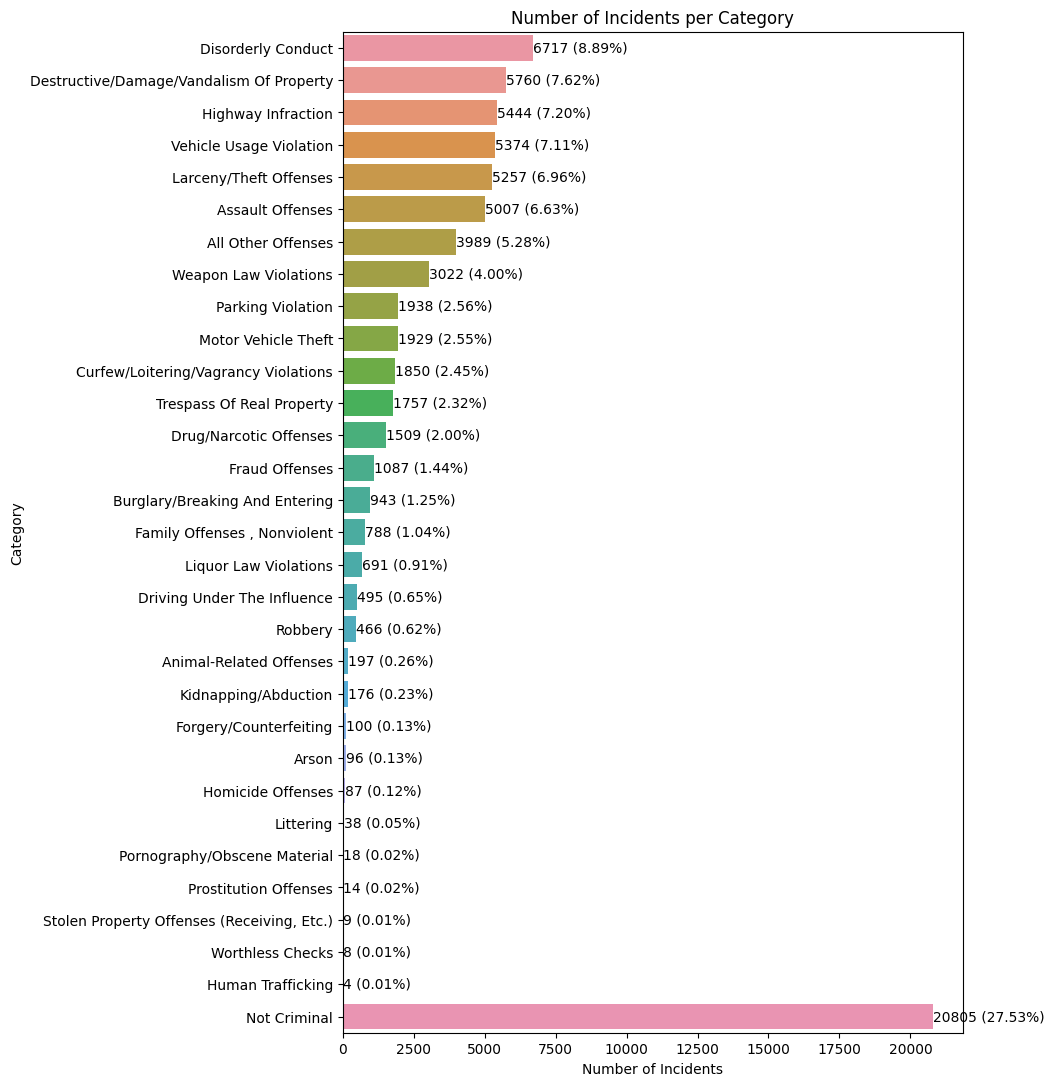

In [ ]:
cases = incidents.groupby('Category').agg(count_incidents=('CaseNum', 'count')).reset_index()
cases = cases.sort_values(by='count_incidents', ascending=False)

# Move 'Not Criminal' category to the last row
not_criminal_row = cases[cases['Category'] == 'Not Criminal']
cases = cases[cases['Category'] != 'Not Criminal']
cases = pd.concat([cases, not_criminal_row])

# Plotting the bar plot
plt.figure(figsize=(8, 13))
sns.barplot(x='count_incidents', y='Category', data=cases)
plt.xlabel('Number of Incidents')
plt.ylabel('Category')
plt.title('Number of Incidents per Category')

# Add labels to the bars
for i, count in enumerate(cases['count_incidents']):
    if count > 0:
        plt.text(count, i, f'{count} ({count / cases["count_incidents"].sum() * 100:.2f}%)', va='center')

plt.show()

In [ ]:
# Devide group of incidents into 2 category
no_offense = incidents[incidents['Category'] == 'Not Criminal'].copy()
offense = incidents[incidents['Category'] != 'Not Criminal'].copy()

In this stage, I divided the data into two groups:<br>
a. Non-offense: These are incidents reported by the police that are not categorized as offenses. The police may use a code and description indicating "no offense." These incidents could include encounters with wild animals or police inspections prompted by community calls to 911 that turned out to be non-events.<br>
b. Offense: These are incidents where the police clearly write the NIBRS code and offense description.

## Geographical Based

In [ ]:
incident_geo = incidents[['CaseNum', 'NibrsCode','Category', 'Neighborhood', 'Geometry']]

In [ ]:
incident_geo

CaseNum NibrsCode                                  Category  \
0      21-031644      9999                   Vehicle Usage Violation   
1      21-017029       520                     Weapon Law Violations   
2       21-14757       23F                    Larceny/Theft Offenses   
3      21-019332      9999                   Vehicle Usage Violation   
4      21-023825      9999                        Highway Infraction   
...          ...       ...                                       ...   
75570  23-006195       13A                          Assault Offenses   
75571  23-014503       290  Destructive/Damage/Vandalism Of Property   
75572  23-014513      9999                              Not Criminal   
75573  23-014499      9999                              Not Criminal   
75574  23-014553       240                       Motor Vehicle Theft   

       Neighborhood                                  Geometry  
0      UPPER ALBANY   (41.77709143718237, -72.69121507084644)  
1         NORTHEAST   (41.78957192124576, -72.67973889192693)  
2           WESTEND  (41.770770000171076, -72.71016999967199)  
3       ASYLUM HILL  (41.768573311011885, -72.69822853450444)  
4      BARRY SQUARE    (41.7498038232749, -72.67406228357933)  
...             ...                                       ...  
75570   FROG HOLLOW   (41.75817426762926, -72.68735255936974)  
75571       WESTEND   (41.76407082384591, -72.71436353667885)  
75572   ASYLUM HILL   (41.77356005596578, -72.68595408913966)  
75573   ASYLUM HILL   (41.76799770600936, -72.70209672608517)  
75574   FROG HOLLOW   (41.76317439471867, -72.69130644859251)  

[75575 rows x 5 columns]

### Non Criminal

In [ ]:
non_crime_each_neighborhood = no_offense.groupby(['Neighborhood', 'Category']).agg(
    cases=('CaseNum', 'count')
).sort_values(by='cases', ascending=False).reset_index()

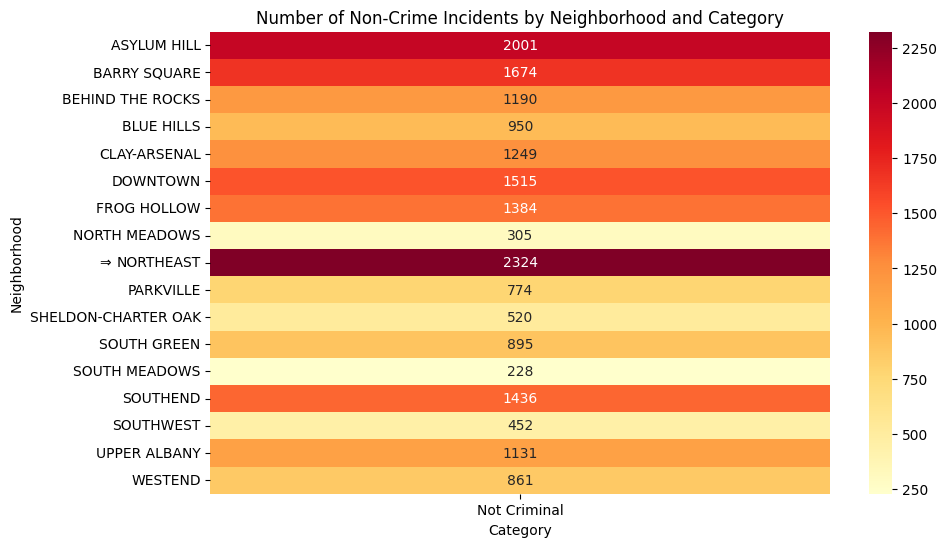

In [ ]:
heatmap_data = non_crime_each_neighborhood.pivot('Neighborhood', 'Category', 'cases')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g')
plt.xlabel('Category')
plt.ylabel('Neighborhood')
plt.title('Number of Non-Crime Incidents by Neighborhood and Category')

# Visual Cues
plt.text(-0.18, + 8.6, '⇒', color='black')

# Display the plot
plt.show()

The majority of non-crime incidents are located in the Northeas (darker red). This suggests that the community in this area is highly responsive to incidents, even if they do not involve criminal activities.

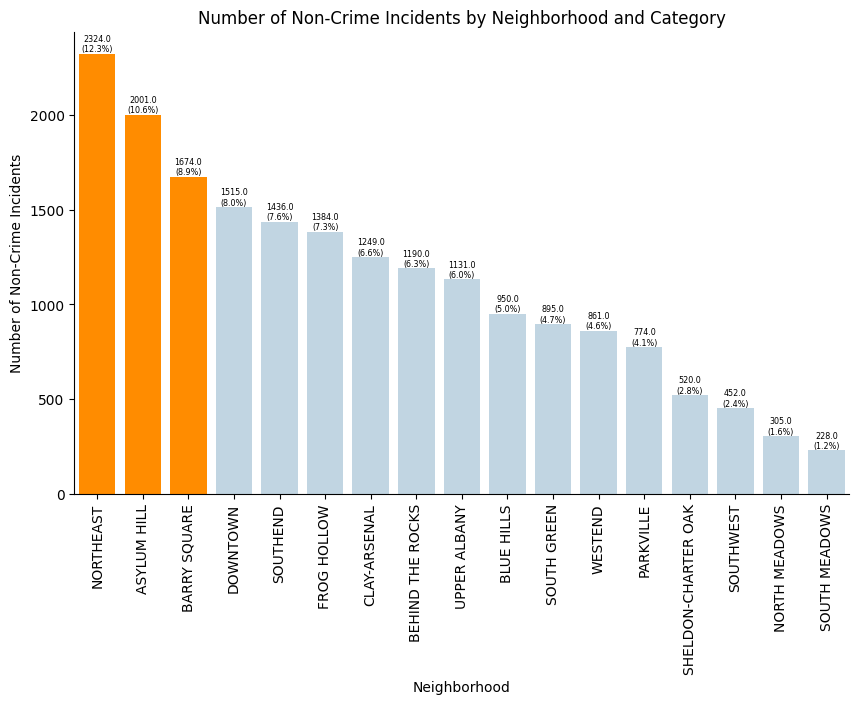

In [ ]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=non_crime_each_neighborhood, x='Neighborhood', y='cases', hue='Category')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Non-Crime Incidents')
plt.title('Number of Non-Crime Incidents by Neighborhood and Category')
plt.xticks(rotation=90)

for i, bar in enumerate(barplot.patches):
    if i < 3:
        bar.set_facecolor('darkorange')
    else:
        bar.set_alpha(0.3)

    height = bar.get_height()
    percentage = (height / non_crime_each_neighborhood['cases'].sum()) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=5.8)

barplot.legend_.remove()

sns.despine(top=True, right=True)
plt.show()

In [ ]:
non_crime_agg =  no_offense.groupby(['Geometry']).agg( cases = ('CaseNum', 'count')
).reset_index()
non_crime_agg.head()

Geometry  cases
0   (41.72401802274639, -72.71083700087681)      1
1  (41.724610109329205, -72.71387098356024)      1
2   (41.724650982911875, -72.7127861390614)      1
3    (41.724677480668475, -72.711659505422)      2
4   (41.724719526728244, -72.7103679801078)      1

In [ ]:
non_crime_agg['Lat'] = non_crime_agg['Geometry'].apply(lambda x: x.split(',')[0].strip('()'))
non_crime_agg['Long'] = non_crime_agg['Geometry'].apply(lambda x: x.split(',')[1].strip('()'))

In [ ]:
non_crime_agg['Lat'] = non_crime_agg['Lat'].astype(float)
non_crime_agg['Long'] = non_crime_agg['Long'].astype(float)

In [ ]:
fig = px.density_mapbox(data_frame = non_crime_agg, lat='Lat', lon='Long', z='cases', center=dict(lat=41.7637, lon=-72.6851), zoom=11,
                          mapbox_style="stamen-terrain")

fig

Here is the distribution of incidents in Hartford. I wish I could identify them by neighborhood for more clarity, but from here we can see that most non-crime incidents are concentrated in the top neighborhoods Northeast up to Barry Square.<br>

It is also worth noting that there is one hotspot with a high number of incidents, which may be due to the initial preprocessing where only street names were used to determine their geometry points.

Neighborhood Visualization:

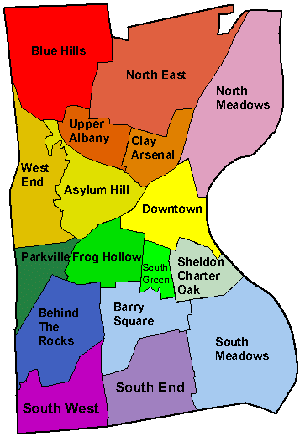

### Offense & Crime

In [ ]:
offense_each_neighborhood = offense.groupby(['Category', 'Neighborhood']).agg(
    cases = ('CaseNum', 'count')
).reset_index()

In [ ]:
offense_each_neighborhood = offense_each_neighborhood.pivot(index='Category', columns='Neighborhood', values='cases')
offense_each_neighborhood.head()

Neighborhood                    ASYLUM HILL  BARRY SQUARE  BEHIND THE ROCKS  \
Category                                                                      
All Other Offenses                    284.0         278.0             216.0   
Animal-Related Offenses                12.0          16.0              15.0   
Arson                                   5.0           5.0               7.0   
Assault Offenses                      514.0         437.0             248.0   
Burglary/Breaking And Entering         95.0         109.0              37.0   

Neighborhood                    BLUE HILLS  CLAY-ARSENAL  DOWNTOWN  \
Category                                                             
All Other Offenses                    84.0         226.0     873.0   
Animal-Related Offenses               12.0           5.0       3.0   
Arson                                  3.0           4.0       5.0   
Assault Offenses                     193.0         362.0     339.0   
Burglary/Breaking And Entering        46.0          59.0      59.0   

Neighborhood                    FROG HOLLOW  NORTH MEADOWS  NORTHEAST  \
Category                                                                
All Other Offenses                    259.0           50.0      344.0   
Animal-Related Offenses                12.0            NaN       22.0   
Arson                                   9.0            NaN       13.0   
Assault Offenses                      383.0           40.0      523.0   
Burglary/Breaking And Entering         67.0            8.0       77.0   

Neighborhood                    PARKVILLE  SHELDON-CHARTER OAK  SOUTH GREEN  \
Category                                                                      
All Other Offenses                  161.0                 78.0        175.0   
Animal-Related Offenses              18.0                  4.0          8.0   
Arson                                10.0                  5.0          2.0   
Assault Offenses                    188.0                105.0        340.0   
Burglary/Breaking And Entering       82.0                 19.0         35.0   

Neighborhood                    SOUTH MEADOWS  SOUTHEND  SOUTHWEST  \
Category                                                             
All Other Offenses                       26.0     178.0       50.0   
Animal-Related Offenses                   1.0      12.0       21.0   
Arson                                     NaN       9.0        2.0   
Assault Offenses                         26.0     363.0       76.0   
Burglary/Breaking And Entering           20.0      95.0       17.0   

Neighborhood                    UPPER ALBANY  WESTEND  
Category                                               
All Other Offenses                     164.0    103.0  
Animal-Related Offenses                 10.0      8.0  
Arson                                    5.0      3.0  
Assault Offenses                       315.0    175.0  
Burglary/Breaking And Entering          41.0     44.0

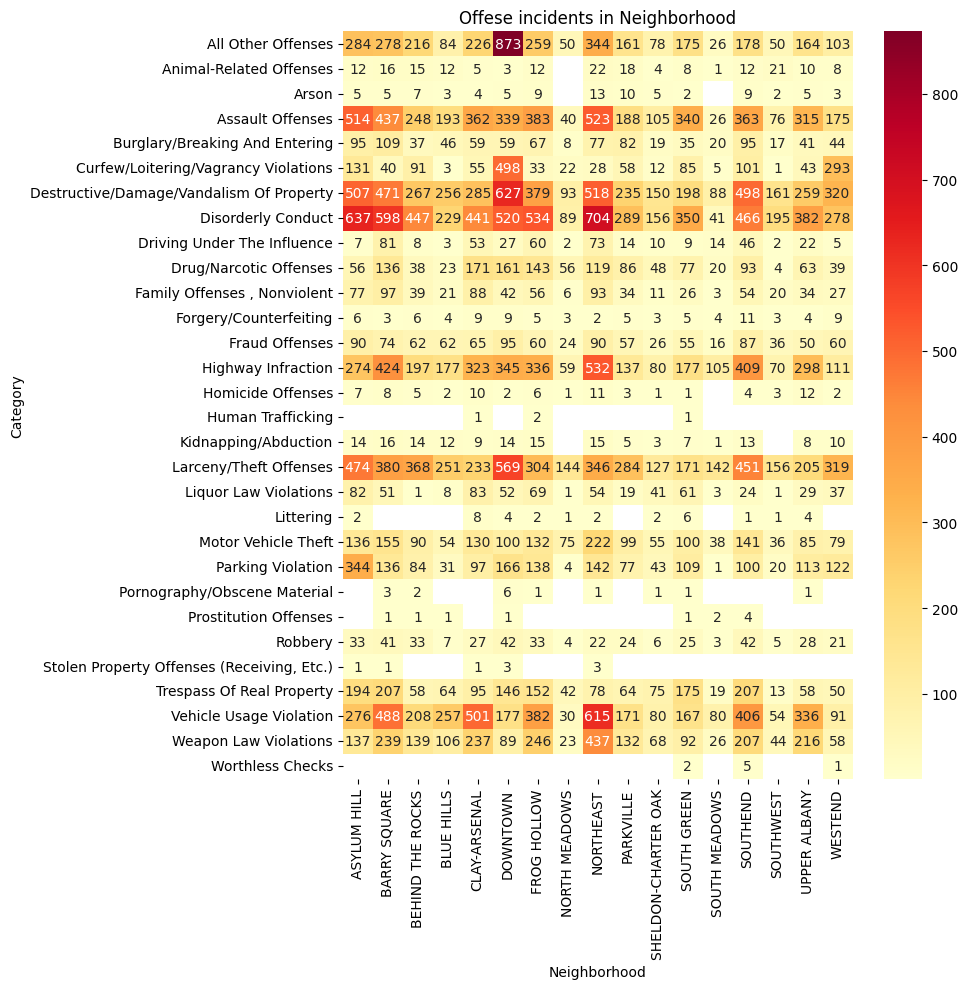

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(offense_each_neighborhood, cmap='YlOrRd', annot=True, fmt='g')

# Customize the plot
plt.title('Offese incidents in Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Category')

# Adjust spacing between cells
plt.tight_layout()

# Display the plot
plt.show()

I understand that this visualization can be overwhelming. Let's try using Pareto analysis to gain better insights.

#### Agg 70 20 10

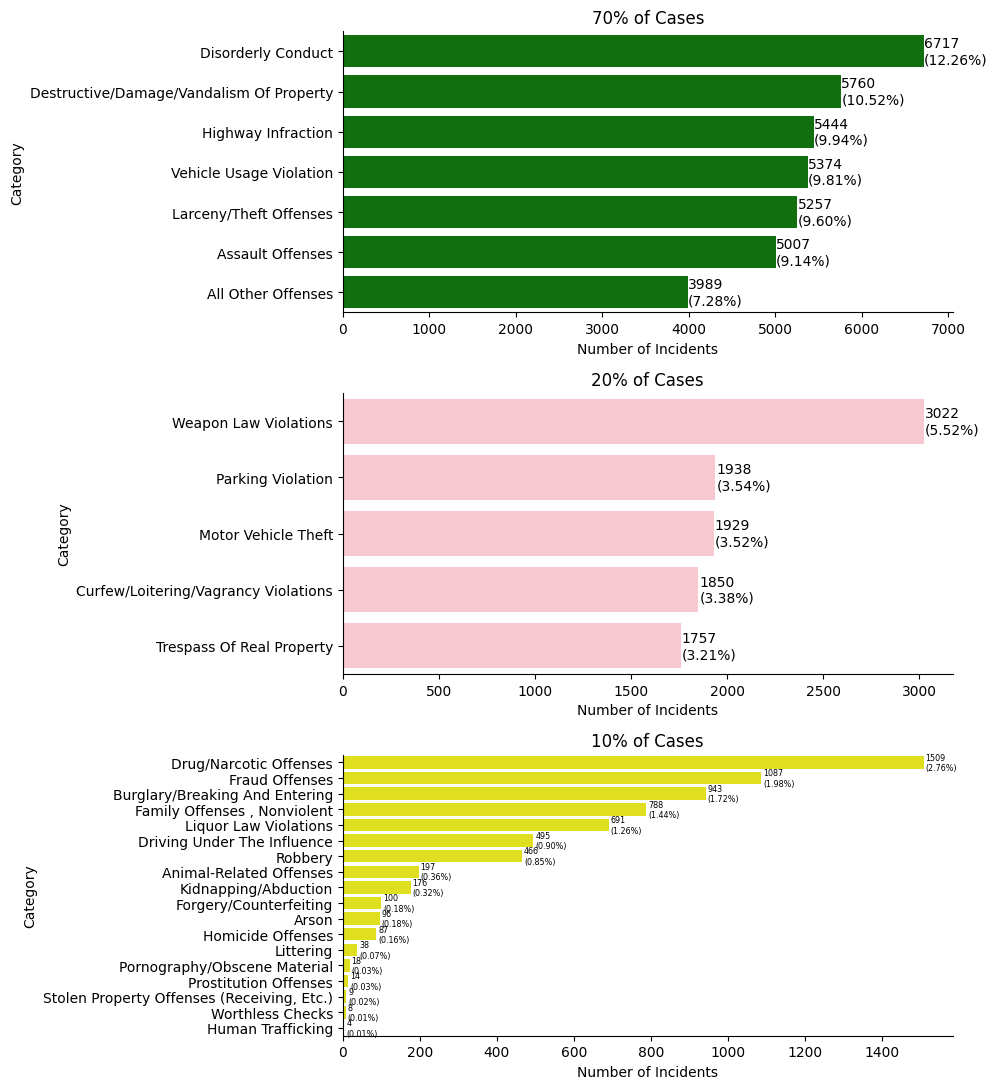

In [ ]:
cases = offense.groupby('Category').agg(count_incidents=('CaseNum', 'count')).reset_index()
cases = cases.sort_values(by='count_incidents', ascending=False)

total_incidents = cases['count_incidents'].sum()
cases['cumulative_percentage'] = cases['count_incidents'].cumsum()/total_incidents * 100

green_limit = 70
pink_limit = 90

cases['color_category'] = pd.cut(cases['cumulative_percentage'], bins=[0, green_limit, pink_limit, 100], labels=['70% of cases', '20% of cases', '10% of cases'])

# Create separate bar plots for each color category
green_cases = cases[cases['color_category'] == '70% of cases']
pink_cases = cases[cases['color_category'] == '20% of cases']
yellow_cases = cases[cases['color_category'] == '10% of cases']

# Create three subplots for each color category
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 11))

# Plot the green category
sns.barplot(x='count_incidents', y='Category', data=green_cases, color='green', ax=axes[0])
axes[0].set_xlabel('Number of Incidents')
axes[0].set_ylabel('Category')
axes[0].set_title('70% of Cases')

# Add percentage and sum of incidents labels for the green category
for i, count in enumerate(green_cases['count_incidents']):
    if count > 0:
        percentage = (count / total_incidents) * 100
        axes[0].text(count + 5, i, f'{count}\n({percentage:.2f}%)', ha='left', va='center')


# Plot the pink category
sns.barplot(x='count_incidents', y='Category', data=pink_cases, color='pink', ax=axes[1])
axes[1].set_xlabel('Number of Incidents')
axes[1].set_ylabel('Category')
axes[1].set_title('20% of Cases')

# Add percentage and sum of incidents labels for the pink category
for i, count in enumerate(pink_cases['count_incidents']):
    if count > 0:
        percentage = (count / total_incidents) * 100
        axes[1].text(count + 5, i, f'{count}\n({percentage:.2f}%)', ha='left', va='center')

# Plot the yellow category
sns.barplot(x='count_incidents', y='Category', data=yellow_cases, color='yellow', ax=axes[2])
axes[2].set_xlabel('Number of Incidents')
axes[2].set_ylabel('Category')
axes[2].set_title('10% of Cases')

# Add percentage and sum of incidents labels for the yellow category
for i, count in enumerate(yellow_cases['count_incidents']):
    if count > 0:
        percentage = (count / total_incidents) * 100
        axes[2].text(count + 5, i, f'{count}\n({percentage:.2f}%)', ha='left', va='center', fontsize = 5.8)


# Remove the top and right spines
sns.despine(top=True, right=True)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
pink_cases['Category'].unique()

array(['Weapon Law Violations', 'Parking Violation',
       'Motor Vehicle Theft', 'Curfew/Loitering/Vagrancy Violations',
       'Trespass Of Real Property'], dtype=object)

In [ ]:
def percentage(category):
    if category in ['Disorderly Conduct', 'Destructive/Damage/Vandalism Of Property',
                    'Highway Infraction', 'Vehicle Usage Violation',
                    'Larceny/Theft Offenses', 'Assault Offenses', 'All Other Offenses']:

        return 'first_70'

    elif category in ['Weapon Law Violations', 'Parking Violation',
                      'Motor Vehicle Theft', 'Curfew/Loitering/Vagrancy Violations',
                      'Trespass Of Real Property']:
        return 'other_20'
    else:
        return 'last_10'

In [ ]:
offense['Category_perc'] = offense['Category'].map(percentage)

##### first 70%

In [ ]:
first_70_offense_data = offense[offense ['Category_perc'] == 'first_70']
first_70_offense = first_70_offense_data.groupby(['Neighborhood', 'Category']).agg(
    cases = ('CaseNum', 'count')
).reset_index()

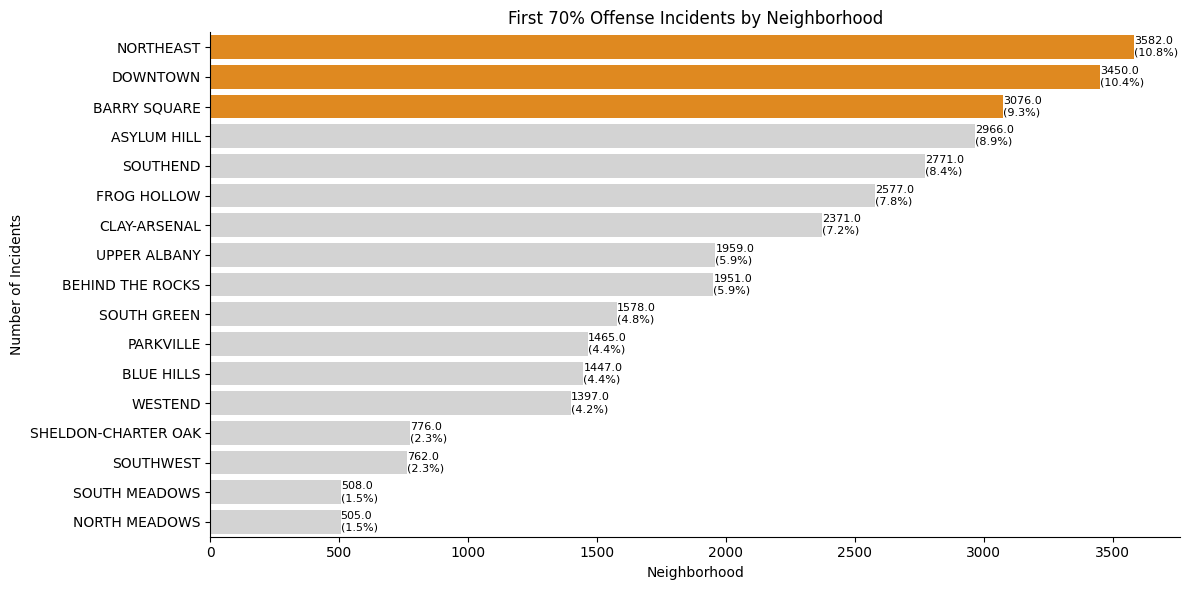

In [ ]:
barchart_70_offense_data = first_70_offense_data.groupby('Neighborhood').agg(count_incidents=('CaseNum', 'count')).reset_index()
barchart_70_offense_data = barchart_70_offense_data.sort_values(by='count_incidents', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=barchart_70_offense_data, x='count_incidents', y='Neighborhood',
            palette=['darkorange' if i < 3 else 'lightgray' for i in range(len(barchart_70_offense_data))])

# Add annotations for sum and percentage of cases
for i, bar in enumerate(plt.gca().patches):
    count = bar.get_width()  # Use bar.get_width() instead of bar.get_height() for horizontal bar chart
    sum_cases = barchart_70_offense_data['count_incidents'].sum()
    percentage = (count / sum_cases) * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count}\n({percentage:.1f}%)',
             va='center', ha='left', fontsize = 8)  # Adjust the coordinates and alignment for horizontal bar chart

# Customize the plot
plt.title('First 70% Offense Incidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')

# Remove the top and right spines
sns.despine(top=True, right=True)

# Adjust spacing between bars
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
barchart_70_offense_data['Neighborhood'].unique()

array(['NORTHEAST', 'DOWNTOWN', 'BARRY SQUARE', 'ASYLUM HILL', 'SOUTHEND',
       'FROG HOLLOW', 'CLAY-ARSENAL', 'UPPER ALBANY', 'BEHIND THE ROCKS',
       'SOUTH GREEN', 'PARKVILLE', 'BLUE HILLS', 'WESTEND',
       'SHELDON-CHARTER OAK', 'SOUTHWEST', 'SOUTH MEADOWS',
       'NORTH MEADOWS'], dtype=object)

In [ ]:
# Define the desired order of categories
category_order = ['Disorderly Conduct', 'Destructive/Damage/Vandalism Of Property', 'Highway Infraction',
                  'Vehicle Usage Violation', 'Larceny/Theft Offenses', 'Assault Offenses', 'All Other Offenses']

first_70_crime_tabel = first_70_offense.pivot(index='Category', columns='Neighborhood', values='cases')
first_70_crime_tabel = first_70_crime_tabel.reindex(category_order)

In [ ]:
first_70_crime_tabel

Neighborhood                              ASYLUM HILL  BARRY SQUARE  \
Category                                                              
Disorderly Conduct                                637           598   
Destructive/Damage/Vandalism Of Property          507           471   
Highway Infraction                                274           424   
Vehicle Usage Violation                           276           488   
Larceny/Theft Offenses                            474           380   
Assault Offenses                                  514           437   
All Other Offenses                                284           278   

Neighborhood                              BEHIND THE ROCKS  BLUE HILLS  \
Category                                                                 
Disorderly Conduct                                     447         229   
Destructive/Damage/Vandalism Of Property               267         256   
Highway Infraction                                     197         177   
Vehicle Usage Violation                                208         257   
Larceny/Theft Offenses                                 368         251   
Assault Offenses                                       248         193   
All Other Offenses                                     216          84   

Neighborhood                              CLAY-ARSENAL  DOWNTOWN  FROG HOLLOW  \
Category                                                                        
Disorderly Conduct                                 441       520          534   
Destructive/Damage/Vandalism Of Property           285       627          379   
Highway Infraction                                 323       345          336   
Vehicle Usage Violation                            501       177          382   
Larceny/Theft Offenses                             233       569          304   
Assault Offenses                                   362       339          383   
All Other Offenses                                 226       873          259   

Neighborhood                              NORTH MEADOWS  NORTHEAST  PARKVILLE  \
Category                                                                        
Disorderly Conduct                                   89        704        289   
Destructive/Damage/Vandalism Of Property             93        518        235   
Highway Infraction                                   59        532        137   
Vehicle Usage Violation                              30        615        171   
Larceny/Theft Offenses                              144        346        284   
Assault Offenses                                     40        523        188   
All Other Offenses                                   50        344        161   

Neighborhood                              SHELDON-CHARTER OAK  SOUTH GREEN  \
Category                                                                     
Disorderly Conduct                                        156          350   
Destructive/Damage/Vandalism Of Property                  150          198   
Highway Infraction                                         80          177   
Vehicle Usage Violation                                    80          167   
Larceny/Theft Offenses                                    127          171   
Assault Offenses                                          105          340   
All Other Offenses                                         78          175   

Neighborhood                              SOUTH MEADOWS  SOUTHEND  SOUTHWEST  \
Category                                                                       
Disorderly Conduct                                   41       466        195   
Destructive/Damage/Vandalism Of Property             88       498        161   
Highway Infraction                                  105       409         70   
Vehicle Usage Violation                              80       406         54   
Larceny/Theft Offenses                            

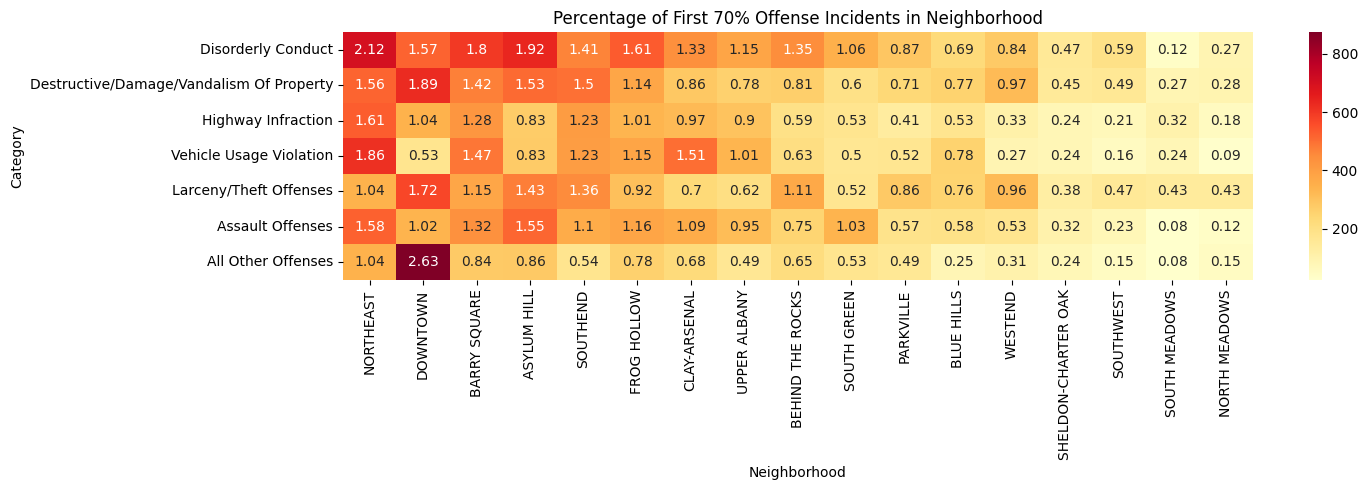

In [ ]:
# Calculate the total number of incidents
total_incidents = first_70_crime_tabel.values.sum()

# Calculate the percentage of crime incidents for each neighborhood
percentage_crime = (first_70_crime_tabel / total_incidents * 100).round(2)


# Sort the columns based sum of incidents
sorted_columns = ['NORTHEAST', 'DOWNTOWN', 'BARRY SQUARE', 'ASYLUM HILL', 'SOUTHEND',
       'FROG HOLLOW', 'CLAY-ARSENAL', 'UPPER ALBANY', 'BEHIND THE ROCKS',
       'SOUTH GREEN', 'PARKVILLE', 'BLUE HILLS', 'WESTEND',
       'SHELDON-CHARTER OAK', 'SOUTHWEST', 'SOUTH MEADOWS',
       'NORTH MEADOWS']



# Create the heatmap with sorted columns
plt.figure(figsize=(15, 5))
sns.heatmap(first_70_crime_tabel[sorted_columns], cmap='YlOrRd', annot=percentage_crime[sorted_columns], fmt='g')

# Customize the plot
plt.title('Percentage of First 70% Offense Incidents in Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Category')

# Adjust spacing between cells
plt.tight_layout()

# Display the plot
plt.show()

Although NORTHEAST holds the highest record in terms of offense incidents, the overall first70% offense data reveals that 2.63% (around 800 incdients of All Other Offenses) of the incidents originate from DOWNTOWN (see first two tables on the right).

In [ ]:
first_70_offense_geo =  first_70_offense_data.groupby(['Geometry']).agg( cases = ('CaseNum', 'count')
).reset_index()
first_70_offense_geo.head()

Geometry  cases
0   (41.72401802274639, -72.71083700087681)      4
1  (41.724141735603204, -72.71395132146337)      8
2   (41.72417883510851, -72.71050406713417)      2
3  (41.724408900110504, -72.71441438380826)      2
4   (41.72462734665939, -72.71310283633323)      3

In [ ]:
first_70_offense_geo['Lat'] = first_70_offense_geo['Geometry'].apply(lambda x: x.split(',')[0].strip('()'))
first_70_offense_geo['Long'] = first_70_offense_geo['Geometry'].apply(lambda x: x.split(',')[1].strip('()'))

In [ ]:
first_70_offense_geo['Lat'] = first_70_offense_geo['Lat'].astype(float)
first_70_offense_geo['Long'] = first_70_offense_geo['Long'].astype(float)

In [ ]:
fig = px.density_mapbox(data_frame = first_70_offense_geo, lat='Lat', lon='Long', z='cases', center=dict(lat=41.7637, lon=-72.6851), zoom=11.5,
                        mapbox_style="stamen-terrain")
fig

##### Next 20%

In [ ]:
other_20_offense_data = offense[offense ['Category_perc'] == 'other_20']
other_20_offense = other_20_offense_data.groupby(['Neighborhood', 'Category']).agg(
    cases = ('CaseNum', 'count')
).reset_index()

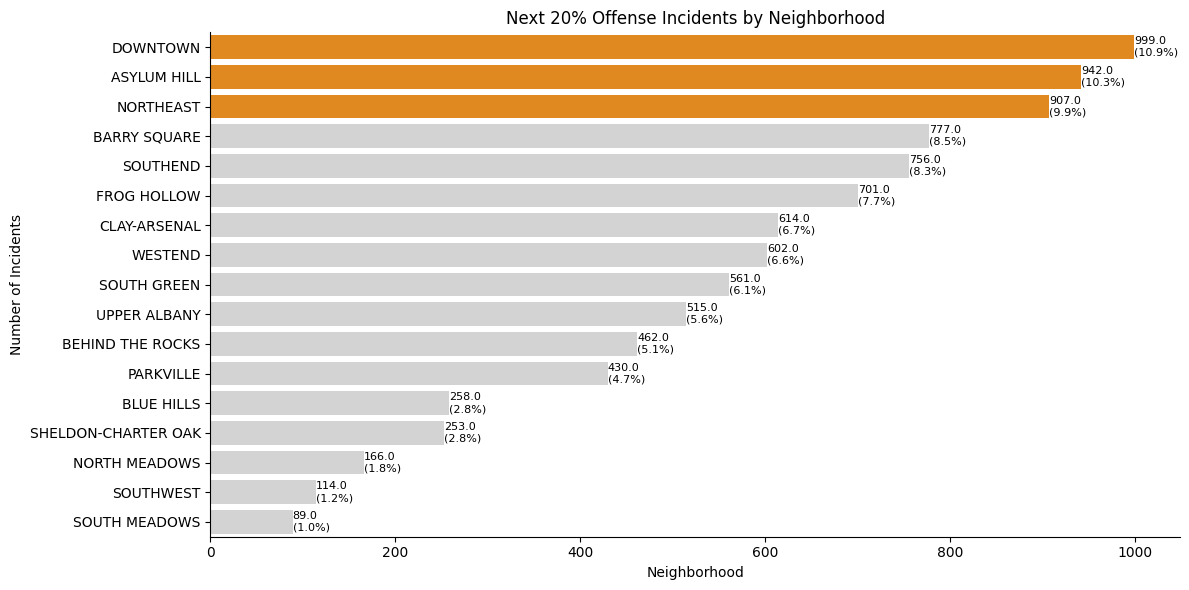

In [ ]:
barchart_20_offense_data = other_20_offense_data.groupby('Neighborhood').agg(count_incidents=('CaseNum', 'count')).reset_index()
barchart_20_offense_data = barchart_20_offense_data.sort_values(by='count_incidents', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=barchart_20_offense_data, x='count_incidents', y='Neighborhood',
            palette=['darkorange' if i < 3 else 'lightgray' for i in range(len(barchart_20_offense_data))])

# Add annotations for sum and percentage of cases
for i, bar in enumerate(plt.gca().patches):
    count = bar.get_width()  # Use bar.get_width() instead of bar.get_height() for horizontal bar chart
    sum_cases = barchart_20_offense_data['count_incidents'].sum()
    percentage = (count / sum_cases) * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count}\n({percentage:.1f}%)',
             va='center', ha='left', fontsize = 8)  # Adjust the coordinates and alignment for horizontal bar chart

# Customize the plot
plt.title('Next 20% Offense Incidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')

# Remove the top and right spines
sns.despine(top=True, right=True)

# Adjust spacing between bars
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
barchart_20_offense_data['Neighborhood'].unique()

array(['DOWNTOWN', 'ASYLUM HILL', 'NORTHEAST', 'BARRY SQUARE', 'SOUTHEND',
       'FROG HOLLOW', 'CLAY-ARSENAL', 'WESTEND', 'SOUTH GREEN',
       'UPPER ALBANY', 'BEHIND THE ROCKS', 'PARKVILLE', 'BLUE HILLS',
       'SHELDON-CHARTER OAK', 'NORTH MEADOWS', 'SOUTHWEST',
       'SOUTH MEADOWS'], dtype=object)

In [ ]:
pink_cases['Category'].unique()

array(['Weapon Law Violations', 'Parking Violation',
       'Motor Vehicle Theft', 'Curfew/Loitering/Vagrancy Violations',
       'Trespass Of Real Property'], dtype=object)

In [ ]:
sorted_category = ['Weapon Law Violations', 'Parking Violation',
       'Motor Vehicle Theft', 'Curfew/Loitering/Vagrancy Violations',
       'Trespass Of Real Property']

other_20_offense_tabel = other_20_offense.pivot(index='Category', columns='Neighborhood', values='cases')
other_20_offense_tabel = other_20_offense_tabel.reindex(sorted_category)

In [ ]:
other_20_offense_tabel

Neighborhood                          ASYLUM HILL  BARRY SQUARE  \
Category                                                          
Weapon Law Violations                         137           239   
Parking Violation                             344           136   
Motor Vehicle Theft                           136           155   
Curfew/Loitering/Vagrancy Violations          131            40   
Trespass Of Real Property                     194           207   

Neighborhood                          BEHIND THE ROCKS  BLUE HILLS  \
Category                                                             
Weapon Law Violations                              139         106   
Parking Violation                                   84          31   
Motor Vehicle Theft                                 90          54   
Curfew/Loitering/Vagrancy Violations                91           3   
Trespass Of Real Property                           58          64   

Neighborhood                          CLAY-ARSENAL  DOWNTOWN  FROG HOLLOW  \
Category                                                                    
Weapon Law Violations                          237        89          246   
Parking Violation                               97       166          138   
Motor Vehicle Theft                            130       100          132   
Curfew/Loitering/Vagrancy Violations            55       498           33   
Trespass Of Real Property                       95       146          152   

Neighborhood                          NORTH MEADOWS  NORTHEAST  PARKVILLE  \
Category                                                                    
Weapon Law Violations                            23        437        132   
Parking Violation                                 4        142         77   
Motor Vehicle Theft                              75        222         99   
Curfew/Loitering/Vagrancy Violations             22         28         58   
Trespass Of Real Property                        42         78         64   

Neighborhood                          SHELDON-CHARTER OAK  SOUTH GREEN  \
Category                                                                 
Weapon Law Violations                                  68           92   
Parking Violation                                      43          109   
Motor Vehicle Theft                                    55          100   
Curfew/Loitering/Vagrancy Violations                   12           85   
Trespass Of Real Property                              75          175   

Neighborhood                          SOUTH MEADOWS  SOUTHEND  SOUTHWEST  \
Category                                                                   
Weapon Law Violations                            26       207         44   
Parking Violation                                 1       100         20   
Motor Vehicle Theft                              38       141         36   
Curfew/Loitering/Vagrancy Violations              5       101          1   
Trespass Of Real Property                        19       207         13   

Neighborhood                          UPPER ALBANY  WESTEND  
Category                                                     
Weapon Law Violations                          216       58  
Parking Violation                              113      122  
Motor Vehicle Theft                             85       79  
Curfew/Loitering/Vagrancy Violations            43      293  
Trespass Of Real Property                       58       50

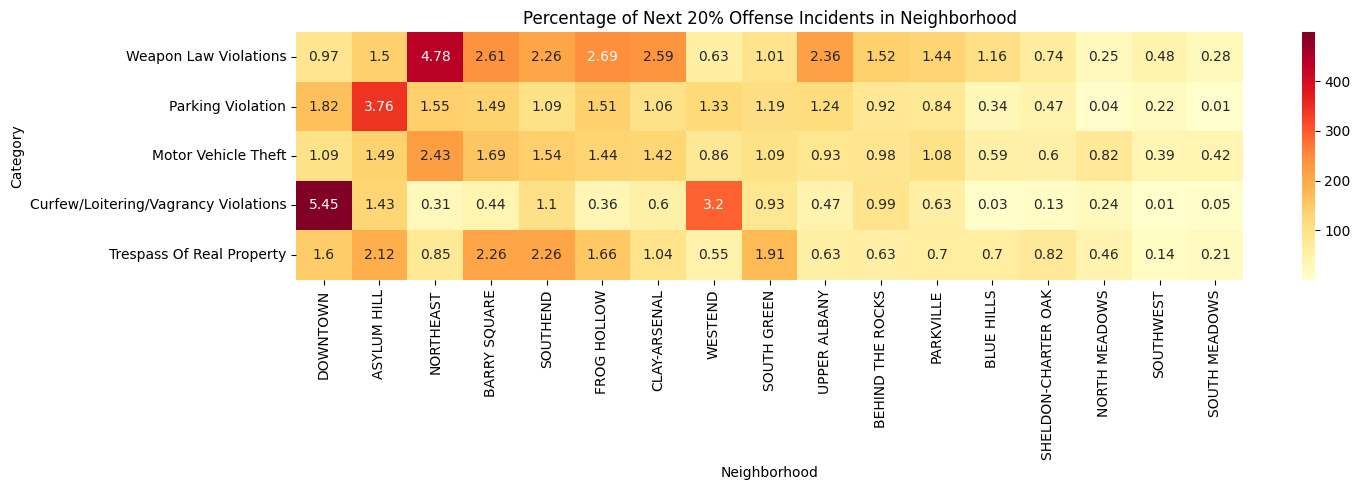

In [ ]:
# Calculate the total number of incidents
total_incidents = other_20_offense_tabel.values.sum()

# Calculate the percentage of crime incidents for each neighborhood
percentage_crime = (other_20_offense_tabel / total_incidents * 100).round(2)

# Sort the columns based sum of incidents
sorted_columns = ['DOWNTOWN', 'ASYLUM HILL', 'NORTHEAST', 'BARRY SQUARE', 'SOUTHEND',
       'FROG HOLLOW', 'CLAY-ARSENAL', 'WESTEND', 'SOUTH GREEN',
       'UPPER ALBANY', 'BEHIND THE ROCKS', 'PARKVILLE', 'BLUE HILLS',
       'SHELDON-CHARTER OAK', 'NORTH MEADOWS', 'SOUTHWEST',
       'SOUTH MEADOWS']

# Create the heatmap with sorted columns
plt.figure(figsize=(15, 5))
sns.heatmap(other_20_offense_tabel[sorted_columns], cmap='YlOrRd', annot=percentage_crime[sorted_columns], fmt='g')

# Customize the plot
plt.title('Percentage of Next 20% Offense Incidents in Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Category')

# Adjust spacing between cells
plt.tight_layout()

# Display the plot
plt.show()

Despite "Weapon Law Violation" being the most prevalent incident category among the next 20% of total incidents, the dominance of "Curfew" issues in DOWNTOWN stands out significantly, accounting for 5.45% of the incidents.

In [ ]:
other_20_offense_geo =  other_20_offense_data.groupby(['Geometry']).agg( cases = ('CaseNum', 'count')
).reset_index()
other_20_offense_geo.head()

Geometry  cases
0  (41.72401802274639, -72.71083700087681)      1
1  (41.72414314850747, -72.71053585558869)      1
2  (41.72517637631878, -72.70998895913455)      1
3  (41.72570843324987, -72.69152117528914)      4
4   (41.72573410050707, -72.7139854544044)      1

In [ ]:
other_20_offense_geo['Lat'] = other_20_offense_geo['Geometry'].apply(lambda x: x.split(',')[0].strip('()'))
other_20_offense_geo['Long'] = other_20_offense_geo['Geometry'].apply(lambda x: x.split(',')[1].strip('()'))

In [ ]:
other_20_offense_geo['Lat'] = other_20_offense_geo['Lat'].astype(float)
other_20_offense_geo['Long'] = other_20_offense_geo['Long'].astype(float)

In [ ]:
fig = px.density_mapbox(data_frame = other_20_offense_geo, lat='Lat', lon='Long', z='cases', center=dict(lat=41.7637, lon=-72.6851), zoom=11.5,
                        mapbox_style="stamen-terrain")
fig

From the above visualization, it is evident that there is a significant number of cases occurring in downtown. The yellow spot in the middle-left section indicates that it corresponds to the Westend neighborhood. Based on the previous data, it is apparent that a substantial number of curfew violations occur in that area

Again, i wish i can get better visualization and plotting each neighborhood, but i think this image might help to understand geographical locations of the neighborhoods.

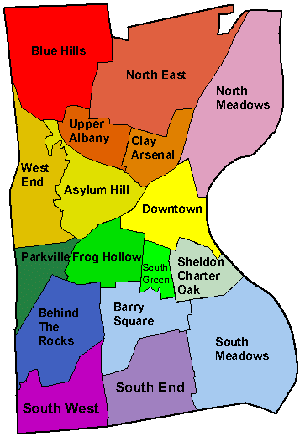

##### last 10%

In [ ]:
last_10_cffense_data = offense[offense ['Category_perc'] == 'last_10']
last_10_cffense = last_10_cffense_data.groupby(['Neighborhood', 'Category']).agg(
    cases = ('CaseNum', 'count')
).reset_index()

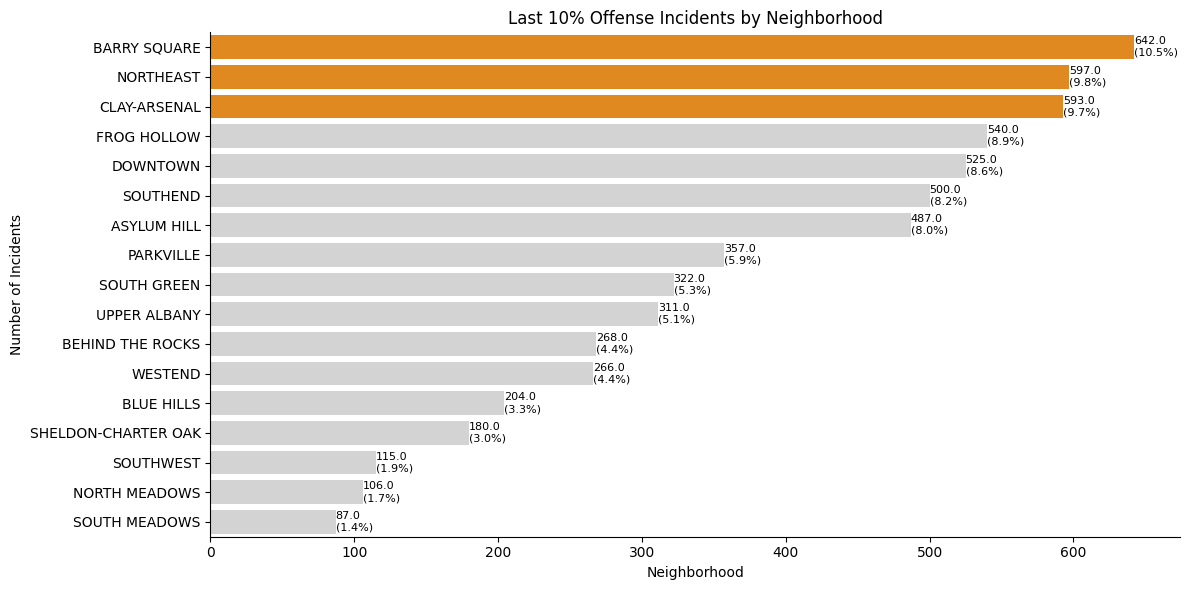

In [ ]:
barchart_10_offense_data = last_10_cffense_data.groupby('Neighborhood').agg(count_incidents=('CaseNum', 'count')).reset_index()
barchart_10_offense_data = barchart_10_offense_data.sort_values(by='count_incidents', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=barchart_10_offense_data, x='count_incidents', y='Neighborhood',
            palette=['darkorange' if i < 3 else 'lightgray' for i in range(len(barchart_10_offense_data))])

# Add annotations for sum and percentage of cases
for i, bar in enumerate(plt.gca().patches):
    count = bar.get_width()  # Use bar.get_width() instead of bar.get_height() for horizontal bar chart
    sum_cases = barchart_10_offense_data['count_incidents'].sum()
    percentage = (count / sum_cases) * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{count}\n({percentage:.1f}%)',
             va='center', ha='left', fontsize = 8)  # Adjust the coordinates and alignment for horizontal bar chart

# Customize the plot
plt.title('Last 10% Offense Incidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')

# Remove the top and right spines
sns.despine(top=True, right=True)

# Adjust spacing between bars
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
barchart_10_offense_data['Neighborhood'].unique()

array(['BARRY SQUARE', 'NORTHEAST', 'CLAY-ARSENAL', 'FROG HOLLOW',
       'DOWNTOWN', 'SOUTHEND', 'ASYLUM HILL', 'PARKVILLE', 'SOUTH GREEN',
       'UPPER ALBANY', 'BEHIND THE ROCKS', 'WESTEND', 'BLUE HILLS',
       'SHELDON-CHARTER OAK', 'SOUTHWEST', 'NORTH MEADOWS',
       'SOUTH MEADOWS'], dtype=object)

In [ ]:
sorted_category = ['Drug/Narcotic Offenses', 'Fraud Offenses',
       'Burglary/Breaking And Entering', 'Family Offenses , Nonviolent',
       'Liquor Law Violations', 'Driving Under The Influence', 'Robbery',
       'Animal-Related Offenses', 'Kidnapping/Abduction',
       'Forgery/Counterfeiting', 'Arson', 'Homicide Offenses',
       'Littering', 'Pornography/Obscene Material',
       'Prostitution Offenses',
       'Stolen Property Offenses (Receiving, Etc.)', 'Worthless Checks',
       'Human Trafficking']

last_10_offense_tabel = last_10_cffense.pivot(index='Category', columns='Neighborhood', values='cases')
last_10_offense_tabel = last_10_offense_tabel.reindex(sorted_category)

In [ ]:
last_10_offense_tabel

Neighborhood                                ASYLUM HILL  BARRY SQUARE  \
Category                                                                
Drug/Narcotic Offenses                             56.0         136.0   
Fraud Offenses                                     90.0          74.0   
Burglary/Breaking And Entering                     95.0         109.0   
Family Offenses , Nonviolent                       77.0          97.0   
Liquor Law Violations                              82.0          51.0   
Driving Under The Influence                         7.0          81.0   
Robbery                                            33.0          41.0   
Animal-Related Offenses                            12.0          16.0   
Kidnapping/Abduction                               14.0          16.0   
Forgery/Counterfeiting                              6.0           3.0   
Arson                                               5.0           5.0   
Homicide Offenses                                   7.0           8.0   
Littering                                           2.0           NaN   
Pornography/Obscene Material                        NaN           3.0   
Prostitution Offenses                               NaN           1.0   
Stolen Property Offenses (Receiving, Etc.)          1.0           1.0   
Worthless Checks                                    NaN           NaN   
Human Trafficking                                   NaN           NaN   

Neighborhood                                BEHIND THE ROCKS  BLUE HILLS  \
Category                                                                   
Drug/Narcotic Offenses                                  38.0        23.0   
Fraud Offenses                                          62.0        62.0   
Burglary/Breaking And Entering                          37.0        46.0   
Family Offenses , Nonviolent                            39.0        21.0   
Liquor Law Violations                                    1.0         8.0   
Driving Under The Influence                              8.0         3.0   
Robbery                                                 33.0         7.0   
Animal-Related Offenses                                 15.0        12.0   
Kidnapping/Abduction                                    14.0        12.0   
Forgery/Counterfeiting                                   6.0         4.0   
Arson                                                    7.0         3.0   
Homicide Offenses                                        5.0         2.0   
Littering                                                NaN         NaN   
Pornography/Obscene Material                             2.0         NaN   
Prostitution Offenses                                    1.0         1.0   
Stolen Property Offenses (Receiving, Etc.)               NaN         NaN   
Worthless Checks                                         NaN         NaN   
Human Trafficking                                        NaN         NaN   

Neighborhood                                CLAY-ARSENAL  DOWNTOWN  \
Category                                                             
Drug/Narcotic Offenses                             171.0     161.0   
Fraud Offenses                                      65.0      95.0   
Burglary/Breaking And Entering                      59.0      59.0   
Family Offenses , Nonviolent                        88.0      42.0   
Liquor Law Violations                               83.0      52.0   
Driving Under The Influence                         53.0      27.0   
Robbery                                             27.0      42.0   
Animal-Related Offenses                              5.0       3.0   
Kidnapping/Abduction                                 9.0      14.0   
Forgery/Counterfeiting                               9.0       9.0   
Arson                                                4.0       5.0   
Homicide Offenses                                   10.0       2.0   
Littering                             

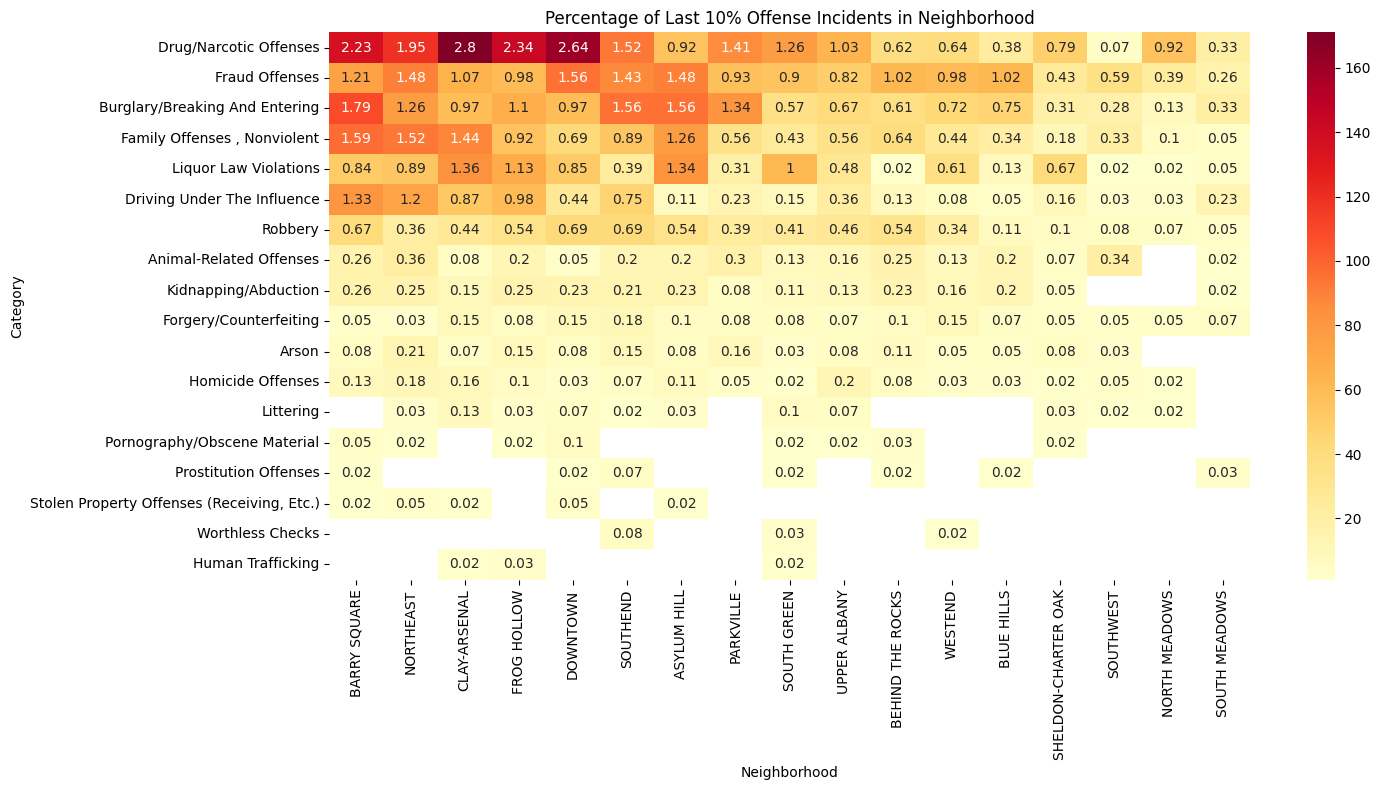

In [ ]:
# Calculate the total number of incidents
total_incidents = np.nansum(last_10_offense_tabel.values)

# Calculate the percentage of crime incidents for each neighborhood
percentage_crime = (last_10_offense_tabel / total_incidents * 100).round(2)

# Sort the columns based sum of incidents
sorted_columns = ['BARRY SQUARE', 'NORTHEAST', 'CLAY-ARSENAL', 'FROG HOLLOW',
       'DOWNTOWN', 'SOUTHEND', 'ASYLUM HILL', 'PARKVILLE', 'SOUTH GREEN',
       'UPPER ALBANY', 'BEHIND THE ROCKS', 'WESTEND', 'BLUE HILLS',
       'SHELDON-CHARTER OAK', 'SOUTHWEST', 'NORTH MEADOWS',
       'SOUTH MEADOWS']

# Create the heatmap with sorted columns
plt.figure(figsize=(15, 8))
sns.heatmap(last_10_offense_tabel[sorted_columns], cmap='YlOrRd', annot=percentage_crime[sorted_columns], fmt='g')

# Customize the plot
plt.title('Percentage of Last 10% Offense Incidents in Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Category')

# Adjust spacing between cells
plt.tight_layout()

# Display the plot
plt.show()

Although Barry Square has the highest number of offenses in the Last 10% of the data, the neighborhood Clay-Arsenal is predominantly dominated by drug/narcotic offenses.

In [ ]:
last_10_cffense_geo =  last_10_cffense_data.groupby(['Geometry']).agg( cases = ('CaseNum', 'count')
).reset_index()
last_10_cffense_geo.head()

Geometry  cases
0   (41.72401802274639, -72.71083700087681)      1
1   (41.72570843324987, -72.69152117528914)      1
2   (41.72608147055387, -72.70146932075599)      1
3   (41.72627518670838, -72.71326491341522)      4
4  (41.726396054758474, -72.70148069616434)      1

In [ ]:
last_10_cffense_geo['Lat'] = last_10_cffense_geo['Geometry'].apply(lambda x: x.split(',')[0].strip('()'))
last_10_cffense_geo['Long'] = last_10_cffense_geo['Geometry'].apply(lambda x: x.split(',')[1].strip('()'))

In [ ]:
last_10_cffense_geo['Lat'] = last_10_cffense_geo['Lat'].astype(float)
last_10_cffense_geo['Long'] = last_10_cffense_geo['Long'].astype(float)

In [ ]:
fig = px.density_mapbox(data_frame = last_10_cffense_geo, lat='Lat', lon='Long', z='cases',center=dict(lat=41.7637, lon=-72.6851), zoom=11.5,
                        mapbox_style="stamen-terrain")
fig

## Time Based

In [ ]:
incidents_time = incidents[['CaseNum', 'Date', 'Time','NibrsCode','Category']].copy()
incidents_time

CaseNum       Date   Time NibrsCode  \
0      21-031644 2021-11-08  19:46      9999   
1      21-017029 2021-06-12  15:21       520   
2       21-14757 2021-05-19  16:30       23F   
3      21-019332 2021-07-06  15:50      9999   
4      21-023825 2021-08-19  17:36      9999   
...          ...        ...    ...       ...   
75570  23-006195 2023-03-06  18:20       13A   
75571  23-014503 2023-05-29  15:36       290   
75572  23-014513 2023-05-29  17:11      9999   
75573  23-014499 2023-05-29  14:35      9999   
75574  23-014553 2023-05-29  23:51       240   

                                       Category  
0                       Vehicle Usage Violation  
1                         Weapon Law Violations  
2                        Larceny/Theft Offenses  
3                       Vehicle Usage Violation  
4                            Highway Infraction  
...                                         ...  
75570                          Assault Offenses  
75571  Destructive/Damage/Vandalism Of Property  
75572                              Not Criminal  
75573                              Not Criminal  
75574                       Motor Vehicle Theft  

[75575 rows x 5 columns]

In [ ]:
incidents_time['is_offensive'] = incidents_time['Category'].apply(lambda x: 0 if x in ['Not Criminal'] else 1)

### Monthly

In [ ]:
incidents_time['month'] = incidents_time['Date'].dt.to_period('M')
incidents_time['month'] = incidents_time['month'].dt.strftime('%b')

# count aggregate traffic per date
incidents_monthly = incidents_time.groupby(['month', 'is_offensive']).agg(
    cases = ('CaseNum', 'count')
).reset_index()

incidents_monthly.head()

month  is_offensive  cases
0   Apr             0   1778
1   Apr             1   4330
2   Aug             0   1679
3   Aug             1   4880
4   Dec             0   1675

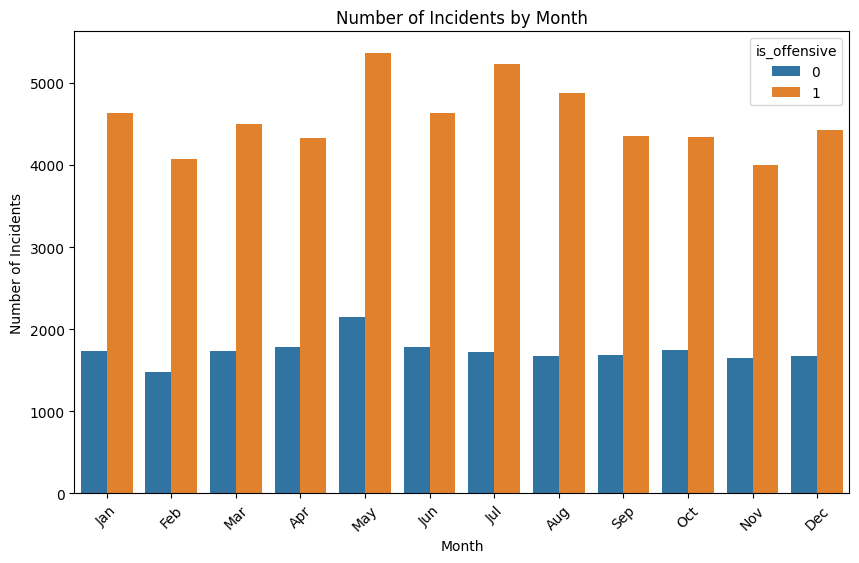

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the aggregated incident data
plt.figure(figsize=(10, 6))
sns.barplot(data=incidents_monthly, x='month', y='cases', hue='is_offensive', order = month_order )

# Customizing the plot
plt.title('Number of Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Seasonal

In [ ]:
import calendar

def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

In [ ]:
incidents_time['Season'] = incidents_time['Date'].apply(get_season)

In [ ]:
# count aggregate traffic per date
incidents_seasonal = incidents_time.groupby(['Season', 'is_offensive']).agg(
    cases = ('CaseNum', 'count')
).reset_index()

incidents_seasonal.head()

Season  is_offensive  cases
0  Autumn             0   5081
1  Autumn             1  12708
2  Spring             0   5662
3  Spring             1  14188
4  Summer             0   5175

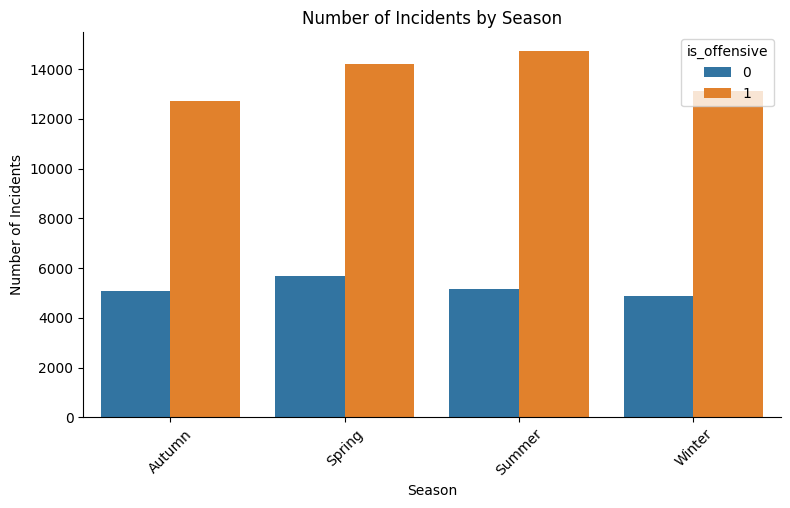

In [ ]:
plt.figure(figsize=(9, 5))
sns.barplot(data=incidents_seasonal, x='Season', y='cases', hue='is_offensive')

# Customizing the plot
plt.title('Number of Incidents by Season')
plt.xlabel('Season')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Remove the top and right spines
sns.despine(top=True, right=True)

# Display the plot
plt.show()

In [ ]:
?plt.legend

The frequency of incidents increases as the temperature rises in that area


#### Crime Seasonal

In [ ]:
crime_seasonal = incidents_time[incidents_time['Category'] != 'Not Criminal']

crime_seasonal = crime_seasonal.groupby(['Category', 'Season',]).agg(
    cases = ('CaseNum', 'count')
).reset_index()

In [ ]:
crime_seasonal_table = crime_seasonal.pivot(index='Category', columns='Season', values='cases')
crime_seasonal_table.head()

Season                          Autumn  Spring  Summer  Winter
Category                                                      
All Other Offenses               964.0  1032.0   990.0  1003.0
Animal-Related Offenses           36.0    65.0    59.0    37.0
Arson                             21.0    32.0    28.0    15.0
Assault Offenses                1230.0  1251.0  1389.0  1137.0
Burglary/Breaking And Entering   208.0   210.0   249.0   276.0

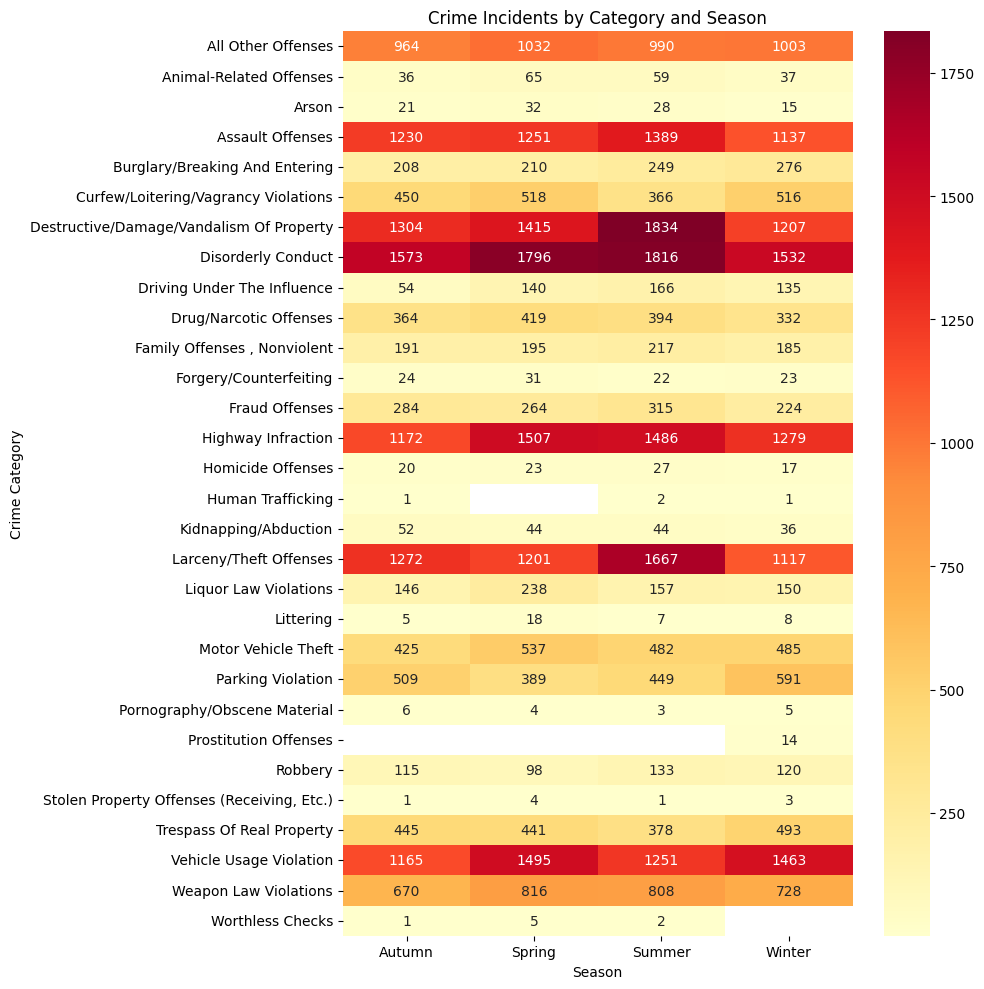

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(crime_seasonal_table, cmap='YlOrRd', annot=True, fmt='g')

# Customize the plot
plt.title('Crime Incidents by Category and Season')
plt.xlabel('Season')
plt.ylabel('Crime Category')

# Adjust spacing between cells
plt.tight_layout()

# Display the plot
plt.show()

### Daily

In [ ]:
incidents_time['day_name'] = incidents_time['Date'].dt.day_name()

In [ ]:
incidents_daily = incidents_time.groupby(['day_name','is_offensive']).agg(
    cases = ('CaseNum', 'count')
).reset_index()

In [ ]:
incidents_daily.head()

day_name  is_offensive  cases
0    Friday             0   2912
1    Friday             1   8719
2    Monday             0   3140
3    Monday             1   7173
4  Saturday             0   2873

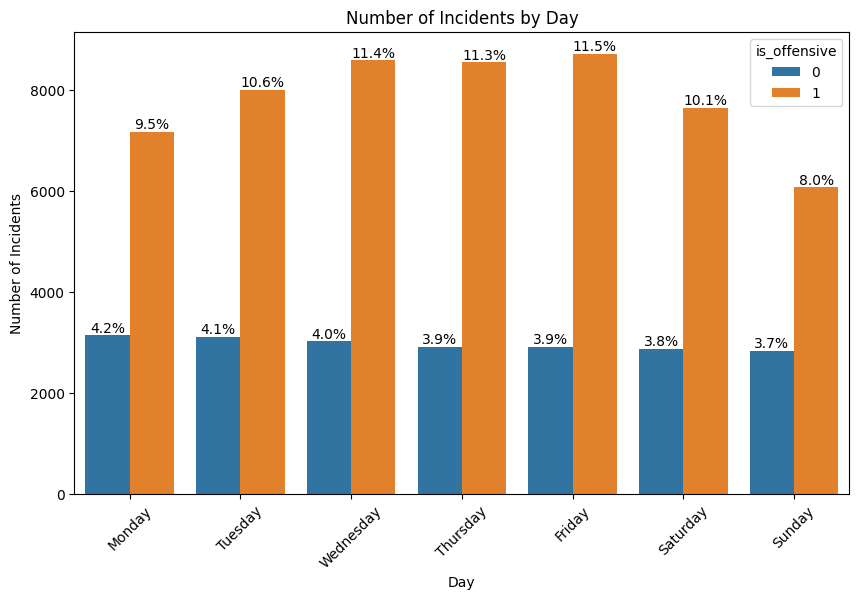

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the aggregated incident data
plt.figure(figsize=(10, 6))
sns.barplot(data=incidents_daily, x='day_name', y='cases', hue='is_offensive', order = day_order )

# Calculate the total number of incidents
total_incidents = incidents_daily['cases'].sum()

# Add percentage labels to each bar
for bar in plt.gca().patches:
    height = bar.get_height()
    percentage = (height / total_incidents) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

# Customizing the plot
plt.title('Number of Incidents by Day')
plt.xlabel('Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

# Display the plot
plt.show()

#### Daily Crime

In [ ]:
daily_crime = incidents_time[incidents_time['Category'] != 'Not Criminal']

daily_crime = daily_crime.groupby(['Category', 'day_name']).agg(
    cases = ('CaseNum', 'count')
).reset_index()

daily_crime_table = daily_crime.pivot(index='Category', columns='day_name', values='cases')
daily_crime_table.head()

day_name                        Friday  Monday  Saturday  Sunday  Thursday  \
Category                                                                     
All Other Offenses               607.0   436.0     584.0   409.0     649.0   
Animal-Related Offenses           26.0    62.0       8.0     3.0      37.0   
Arson                              8.0    13.0      15.0    16.0      14.0   
Assault Offenses                 693.0   699.0     814.0   697.0     712.0   
Burglary/Breaking And Entering   147.0   129.0     127.0   125.0     122.0   

day_name                        Tuesday  Wednesday  
Category                                            
All Other Offenses                638.0      666.0  
Animal-Related Offenses            44.0       17.0  
Arson                              16.0       14.0  
Assault Offenses                  693.0      699.0  
Burglary/Breaking And Entering    151.0      142.0

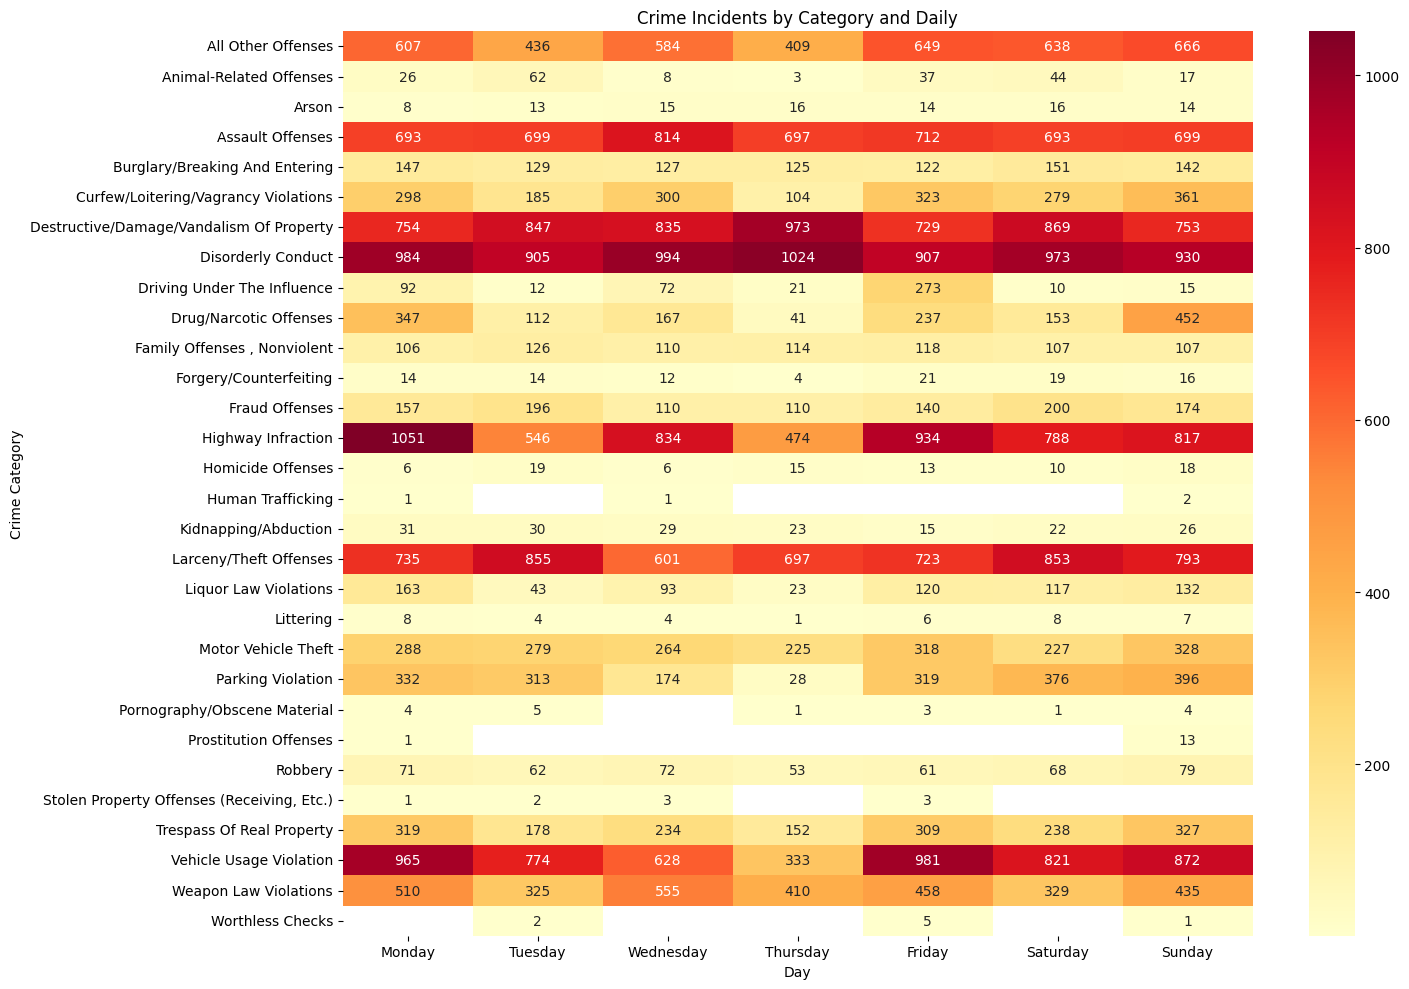

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15, 10))
sns.heatmap(daily_crime_table, cmap='YlOrRd', annot=True, fmt='g', xticklabels=day_order)

# Customize the plot
plt.title('Crime Incidents by Category and Daily')
plt.xlabel('Day')
plt.ylabel('Crime Category')

# Adjust spacing between cells
plt.tight_layout()

# Display the plot
plt.show()

### Hourly

In [ ]:
incidents_time

CaseNum       Date   Time NibrsCode  \
0      21-031644 2021-11-08  19:46      9999   
1      21-017029 2021-06-12  15:21       520   
2       21-14757 2021-05-19  16:30       23F   
3      21-019332 2021-07-06  15:50      9999   
4      21-023825 2021-08-19  17:36      9999   
...          ...        ...    ...       ...   
75570  23-006195 2023-03-06  18:20       13A   
75571  23-014503 2023-05-29  15:36       290   
75572  23-014513 2023-05-29  17:11      9999   
75573  23-014499 2023-05-29  14:35      9999   
75574  23-014553 2023-05-29  23:51       240   

                                       Category  is_offensive month  Season  \
0                       Vehicle Usage Violation             1   Nov  Autumn   
1                         Weapon Law Violations             1   Jun  Summer   
2                        Larceny/Theft Offenses             1   May  Spring   
3                       Vehicle Usage Violation             1   Jul  Summer   
4                            Highway Infraction             1   Aug  Summer   
...                                         ...           ...   ...     ...   
75570                          Assault Offenses             1   Mar  Spring   
75571  Destructive/Damage/Vandalism Of Property             1   May  Spring   
75572                              Not Criminal             0   May  Spring   
75573                              Not Criminal             0   May  Spring   
75574                       Motor Vehicle Theft             1   May  Spring   

        day_name  
0         Monday  
1       Saturday  
2      Wednesday  
3        Tuesday  
4       Thursday  
...          ...  
75570     Monday  
75571     Monday  
75572     Monday  
75573     Monday  
75574     Monday  

[75575 rows x 9 columns]

In [ ]:
incidents_time['is_weekend'] = incidents_time['day_name'].apply(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

In [ ]:
incidents_time['hour_digit'] = incidents_time['Time'].map(lambda x: int(str(x)[:2]))

In [ ]:
hourly_incidents = incidents_time.groupby(['is_weekend', 'hour_digit']).agg(cases = ('CaseNum', 'count')).reset_index()
hourly_incidents.head()

is_weekend  hour_digit  cases
0           0           0    204
1           0           1   1424
2           0           2   1133
3           0           3    996
4           0           4    933

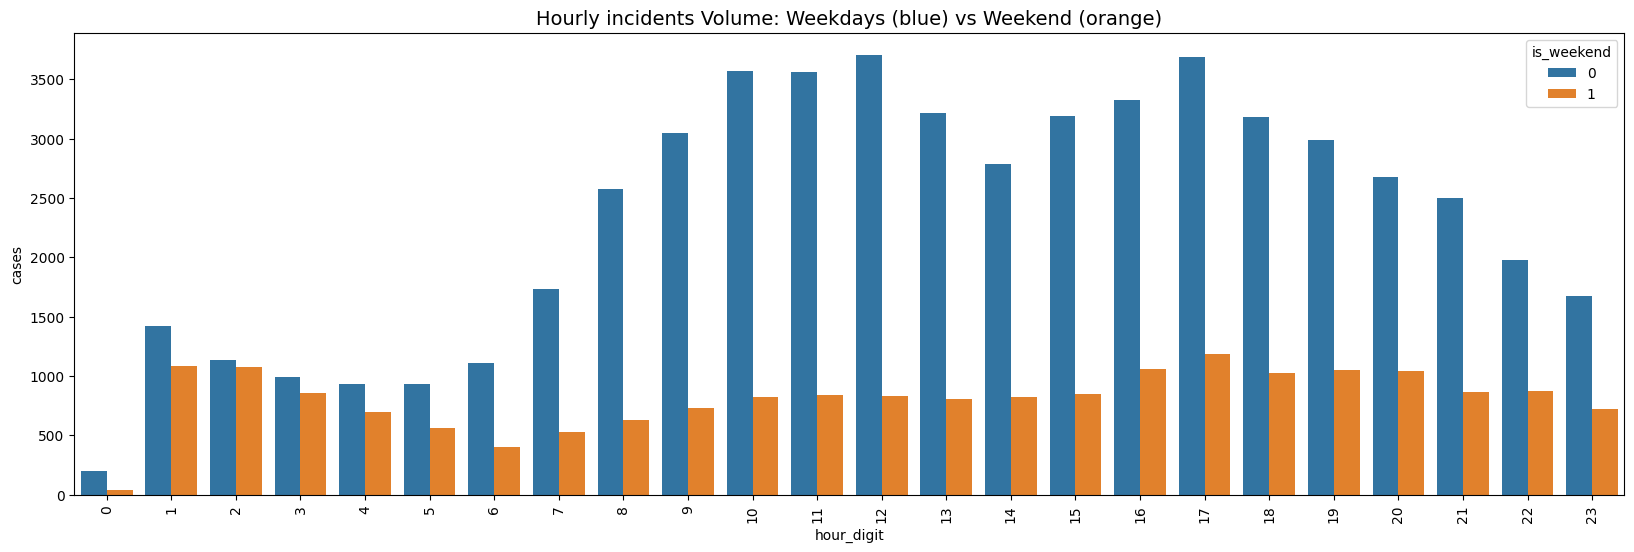

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=hourly_incidents, x='hour_digit', y='cases', hue='is_weekend')
plt.xticks(rotation=90)
plt.title("Hourly incidents Volume: Weekdays (blue) vs Weekend (orange)", fontsize=14)
plt.show()

In [ ]:
def get_time_label(hour):
    if hour >= 6 and hour <= 8:
        return 'Early Morning Commute (6-8 AM)'
    elif hour >= 9 and hour <= 11:
        return 'Before Lunch Break (9-11 AM)'
    elif hour >= 12 and hour <= 14:
        return 'During Lunch Break (12-2 PM)'
    elif hour >= 15 and hour <= 17:
        return 'After Lunch Break (3-5 PM)'
    elif hour >= 18 and hour <= 20:
        return 'Evening Commute (6-8 PM)'
    elif hour >= 21 and hour <= 23:
        return 'After-Work Activities (9-11 PM)'
    elif hour >= 0 and hour <= 2:
        return 'Late Night (12-2 AM)'
    elif hour >= 3 and hour <= 5:
        return 'Early Morning/Dawn (3-5 AM)'
    else:
        return 'Other'


incidents_time['time_aggregation'] = incidents_time['hour_digit'].apply(get_time_label)


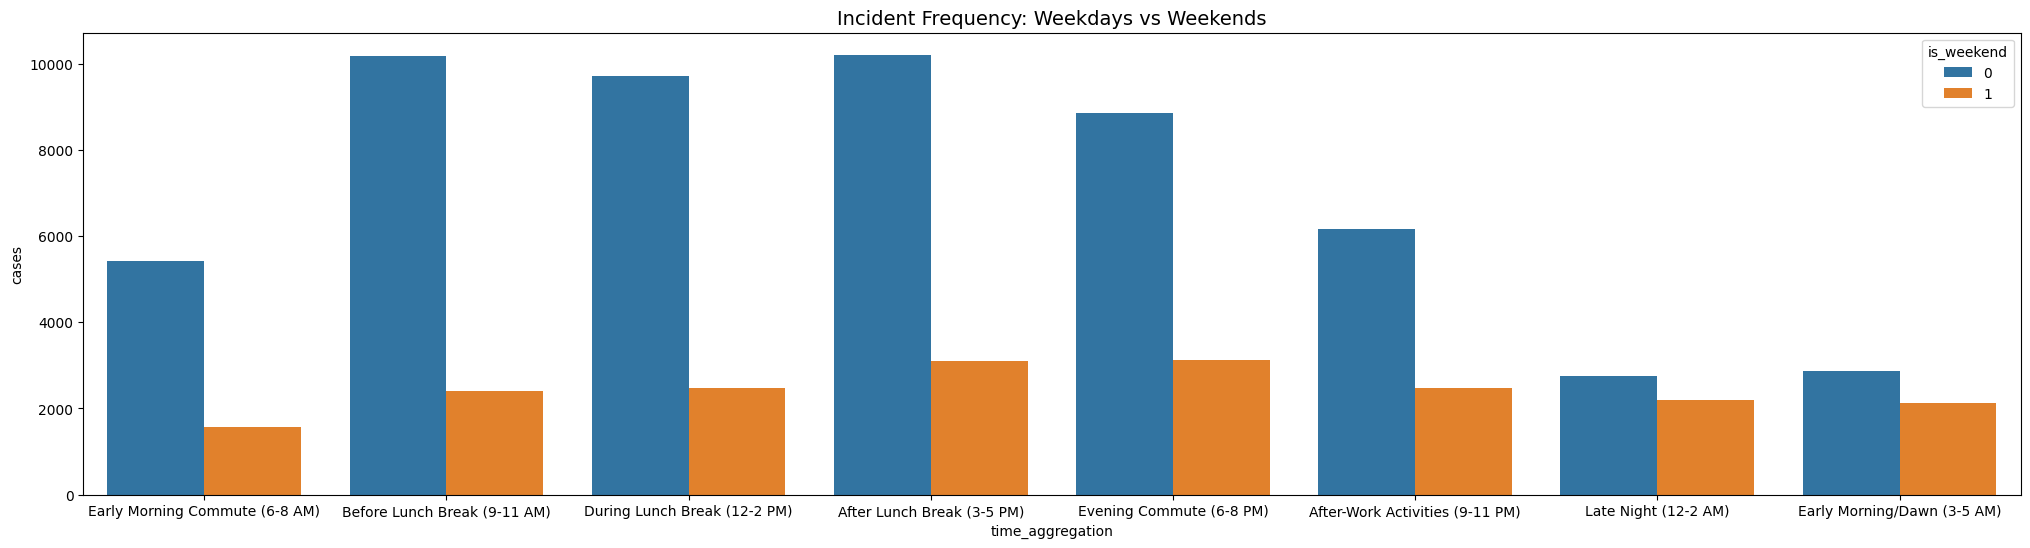

In [ ]:
time_agg_incidents = incidents_time.groupby(['is_weekend', 'time_aggregation']).agg(cases = ('CaseNum', 'count')).reset_index()

time_categories = ['Early Morning Commute (6-8 AM)', 'Before Lunch Break (9-11 AM)', 'During Lunch Break (12-2 PM)',
                    'After Lunch Break (3-5 PM)', 'Evening Commute (6-8 PM)', 'After-Work Activities (9-11 PM)',
                    'Late Night (12-2 AM)', 'Early Morning/Dawn (3-5 AM)']

plt.figure(figsize=(25,6))
sns.barplot(data=time_agg_incidents, x='time_aggregation', y='cases', hue='is_weekend', order = time_categories)
plt.title("Incident Frequency: Weekdays vs Weekends", fontsize=14)
plt.show()

### Hourly Non Crime

In [ ]:
hourly_non_crime = incidents_time[incidents_time['Category'] == 'Not Criminal']
hourly_non_crime = hourly_non_crime.groupby(['is_weekend', 'hour_digit']).agg(cases = ('CaseNum', 'count')).reset_index()
hourly_non_crime.head()

is_weekend  hour_digit  cases
0           0           0     39
1           0           1    502
2           0           2    386
3           0           3    317
4           0           4    290

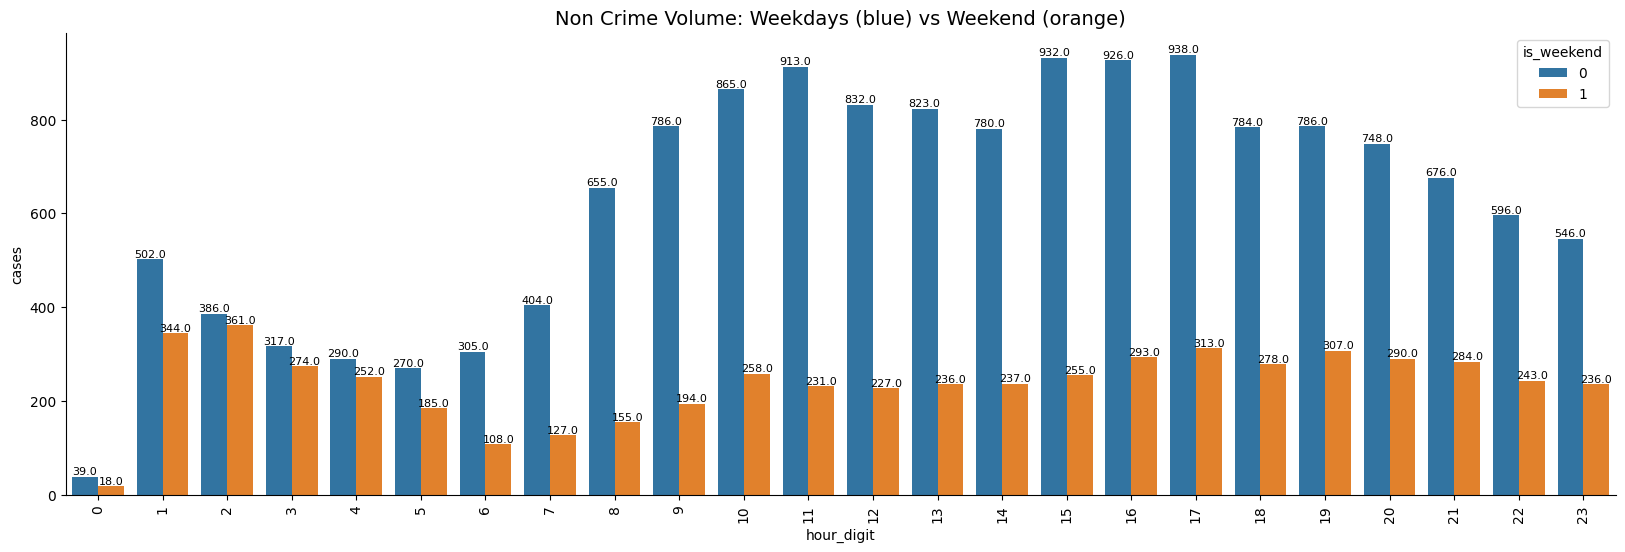

In [ ]:
plt.figure(figsize=(20,6))
barplot = sns.barplot(data=hourly_non_crime, x='hour_digit', y='cases', hue='is_weekend')
plt.xticks(rotation=90)
# Remove the top and right spines
sns.despine(top=True, right=True)
plt.title("Non Crime Volume: Weekdays (blue) vs Weekend (orange)", fontsize=14)

for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height, height, ha='center', va='bottom', fontsize= 8)

plt.show()

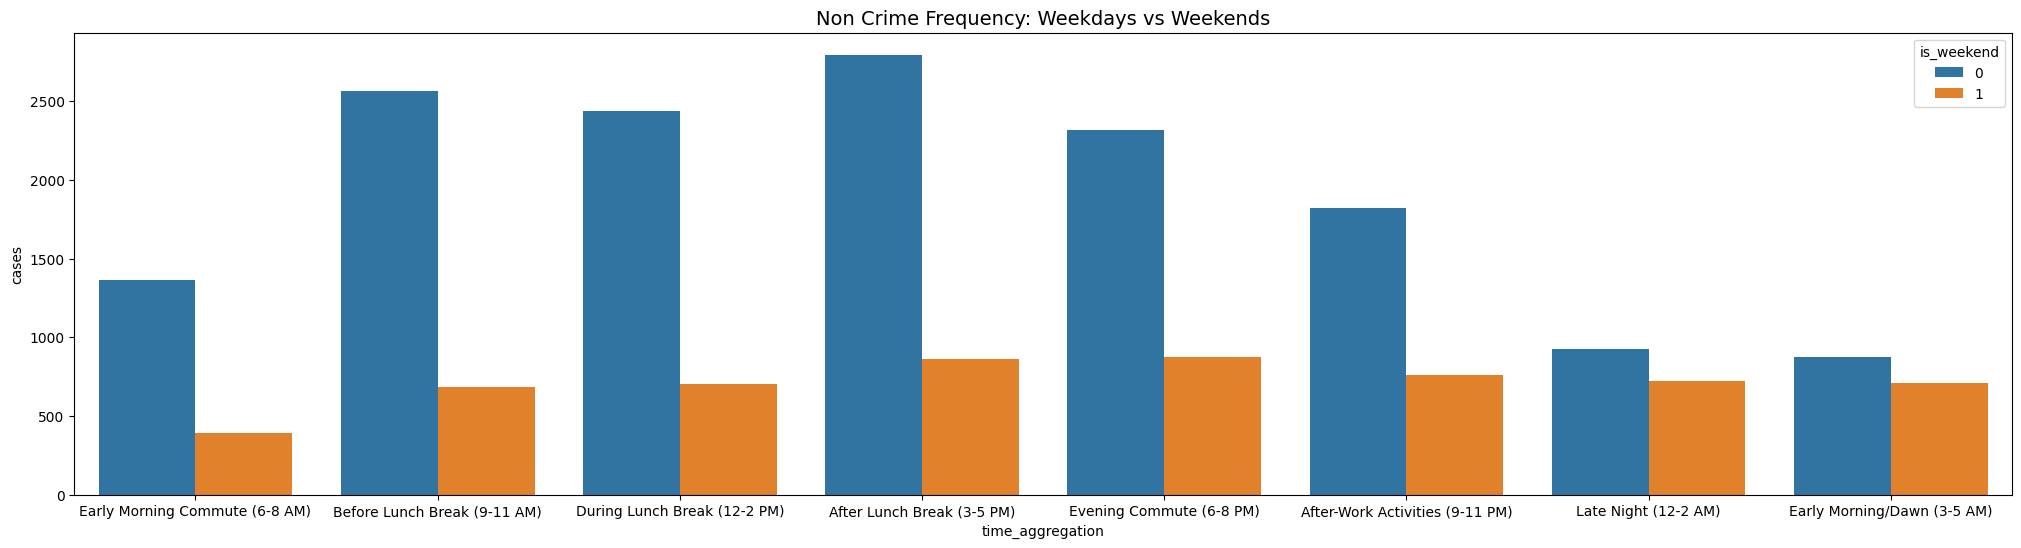

In [ ]:
time_agg_non_crime = incidents_time[incidents_time['Category'] == 'Not Criminal']
time_agg_non_crime = time_agg_non_crime.groupby(['is_weekend', 'time_aggregation']).agg(cases=('CaseNum', 'count')).reset_index()

time_categories = ['Early Morning Commute (6-8 AM)', 'Before Lunch Break (9-11 AM)', 'During Lunch Break (12-2 PM)',
                    'After Lunch Break (3-5 PM)', 'Evening Commute (6-8 PM)', 'After-Work Activities (9-11 PM)',
                    'Late Night (12-2 AM)', 'Early Morning/Dawn (3-5 AM)']

plt.figure(figsize=(25, 6))
sns.barplot(data=time_agg_non_crime, x='time_aggregation', y='cases', hue='is_weekend', order=time_categories)
plt.title("Non Crime Frequency: Weekdays vs Weekends", fontsize=14)

plt.show()

### Hourly Crime

In [ ]:
hourly_crime = incidents_time[incidents_time['Category'] != 'Not Criminal']
hourly_crime = hourly_crime.groupby(['is_weekend', 'hour_digit']).agg(cases = ('CaseNum', 'count')).reset_index()
hourly_crime.head()

is_weekend  hour_digit  cases
0           0           0    165
1           0           1    922
2           0           2    747
3           0           3    679
4           0           4    643

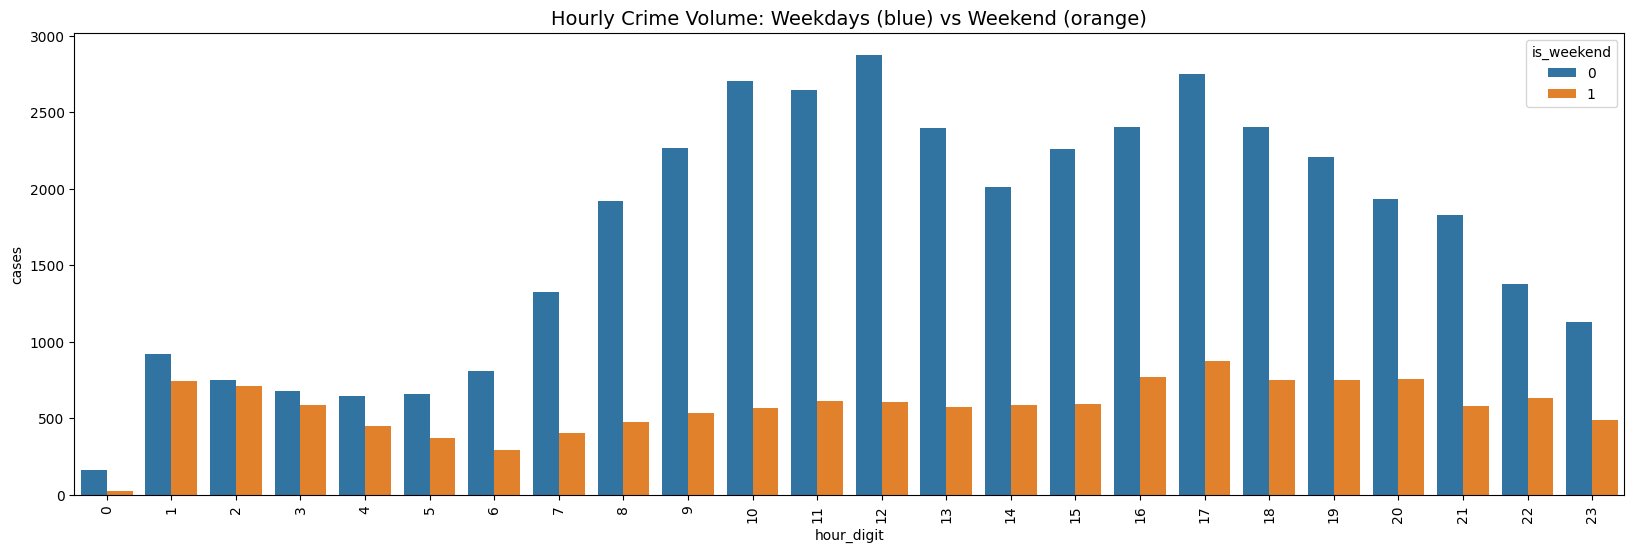

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=hourly_crime, x='hour_digit', y='cases', hue='is_weekend')
plt.xticks(rotation=90)
plt.title("Hourly Crime Volume: Weekdays (blue) vs Weekend (orange)", fontsize=14)
plt.show()

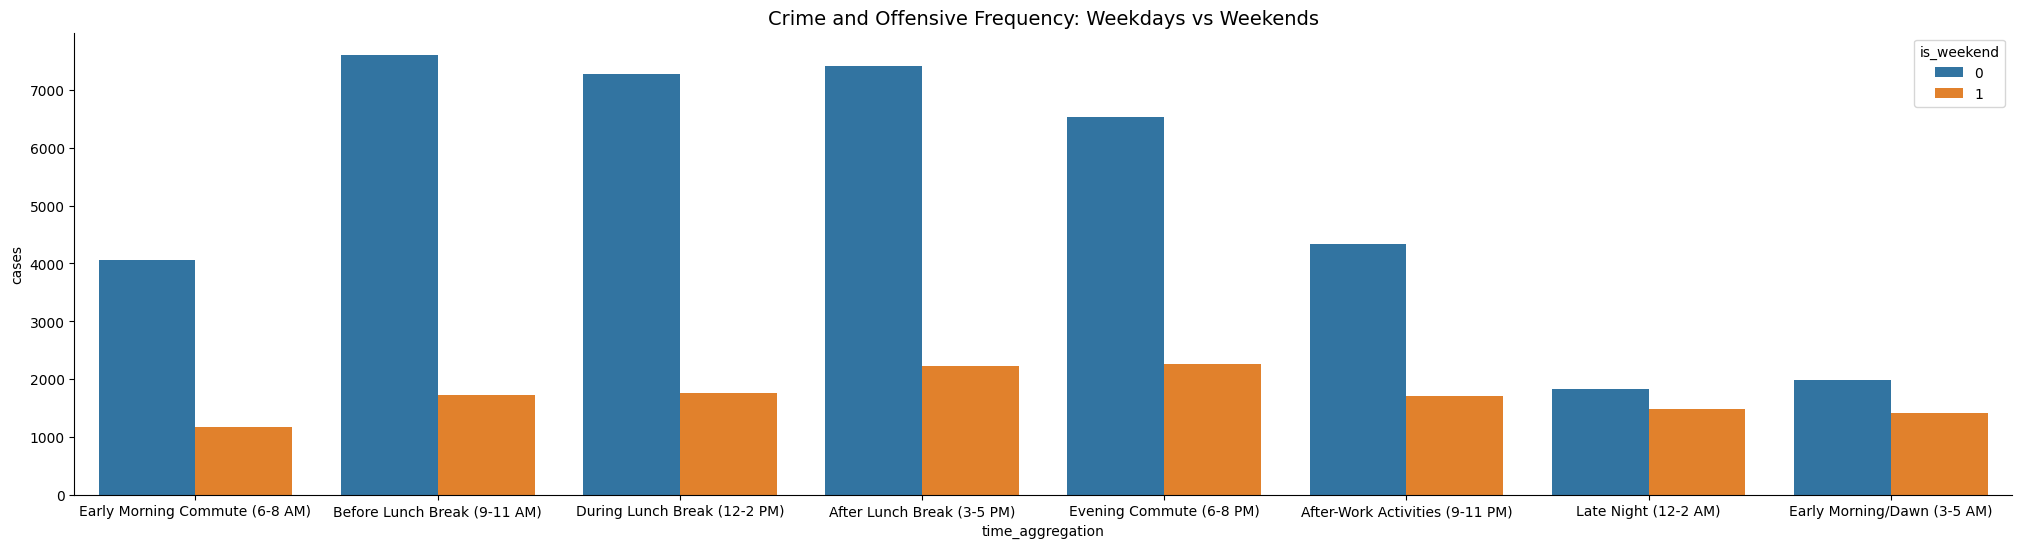

In [ ]:
time_agg_crime_data = incidents_time[incidents_time['Category'] != 'Not Criminal']
time_agg_crime = time_agg_crime_data.groupby(['is_weekend', 'time_aggregation']).agg(cases=('CaseNum', 'count')).reset_index()

time_categories = ['Early Morning Commute (6-8 AM)', 'Before Lunch Break (9-11 AM)', 'During Lunch Break (12-2 PM)',
                    'After Lunch Break (3-5 PM)', 'Evening Commute (6-8 PM)', 'After-Work Activities (9-11 PM)',
                    'Late Night (12-2 AM)', 'Early Morning/Dawn (3-5 AM)']

plt.figure(figsize=(25, 6))
sns.barplot(data=time_agg_crime, x='time_aggregation', y='cases', hue='is_weekend', order=time_categories)
plt.title("Crime and Offensive Frequency: Weekdays vs Weekends", fontsize=14)

sns.despine(top=True, right=True)

plt.show()

In [ ]:
time_agg_crime = time_agg_crime_data.groupby(['Category','is_weekend', 'time_aggregation']).agg(cases=('CaseNum', 'count')).reset_index()
time_agg_crime.head()

Category  is_weekend                 time_aggregation  cases
0  All Other Offenses           0       After Lunch Break (3-5 PM)    524
1  All Other Offenses           0  After-Work Activities (9-11 PM)    379
2  All Other Offenses           0     Before Lunch Break (9-11 AM)    476
3  All Other Offenses           0     During Lunch Break (12-2 PM)    480
4  All Other Offenses           0   Early Morning Commute (6-8 AM)    246

### Kind of crime during working hours

In [ ]:
working_hour_crime = time_agg_crime[time_agg_crime['time_aggregation'].isin(['Before Lunch Break (9-11 AM)', 'During Lunch Break (12-2 PM)','After Lunch Break (3-5 PM)'])]
working_hour_crime = working_hour_crime.groupby(['Category', 'time_aggregation']).agg(
    cases = ('cases', 'sum')
).reset_index()


In [ ]:
working_hour_crime

Category              time_aggregation  cases
0        All Other Offenses    After Lunch Break (3-5 PM)    689
1        All Other Offenses  Before Lunch Break (9-11 AM)    575
2        All Other Offenses  During Lunch Break (12-2 PM)    602
3   Animal-Related Offenses    After Lunch Break (3-5 PM)     35
4   Animal-Related Offenses  Before Lunch Break (9-11 AM)     65
..                      ...                           ...    ...
82    Weapon Law Violations    After Lunch Break (3-5 PM)    401
83    Weapon Law Violations  Before Lunch Break (9-11 AM)    199
84    Weapon Law Violations  During Lunch Break (12-2 PM)    301
85         Worthless Checks  Before Lunch Break (9-11 AM)      2
86         Worthless Checks  During Lunch Break (12-2 PM)      5

[87 rows x 3 columns]

In [ ]:
working_hour_crime_table = working_hour_crime.pivot(index='Category', columns='time_aggregation', values='cases')
working_hour_crime_table.head()

time_aggregation                After Lunch Break (3-5 PM)  \
Category                                                     
All Other Offenses                                   689.0   
Animal-Related Offenses                               35.0   
Arson                                                  6.0   
Assault Offenses                                     920.0   
Burglary/Breaking And Entering                       135.0   

time_aggregation                Before Lunch Break (9-11 AM)  \
Category                                                       
All Other Offenses                                     575.0   
Animal-Related Offenses                                 65.0   
Arson                                                    4.0   
Assault Offenses                                       613.0   
Burglary/Breaking And Entering                         225.0   

time_aggregation                During Lunch Break (12-2 PM)  
Category                                                      
All Other Offenses                                     602.0  
Animal-Related Offenses                                 43.0  
Arson                                                    5.0  
Assault Offenses                                       655.0  
Burglary/Breaking And Entering                         132.0

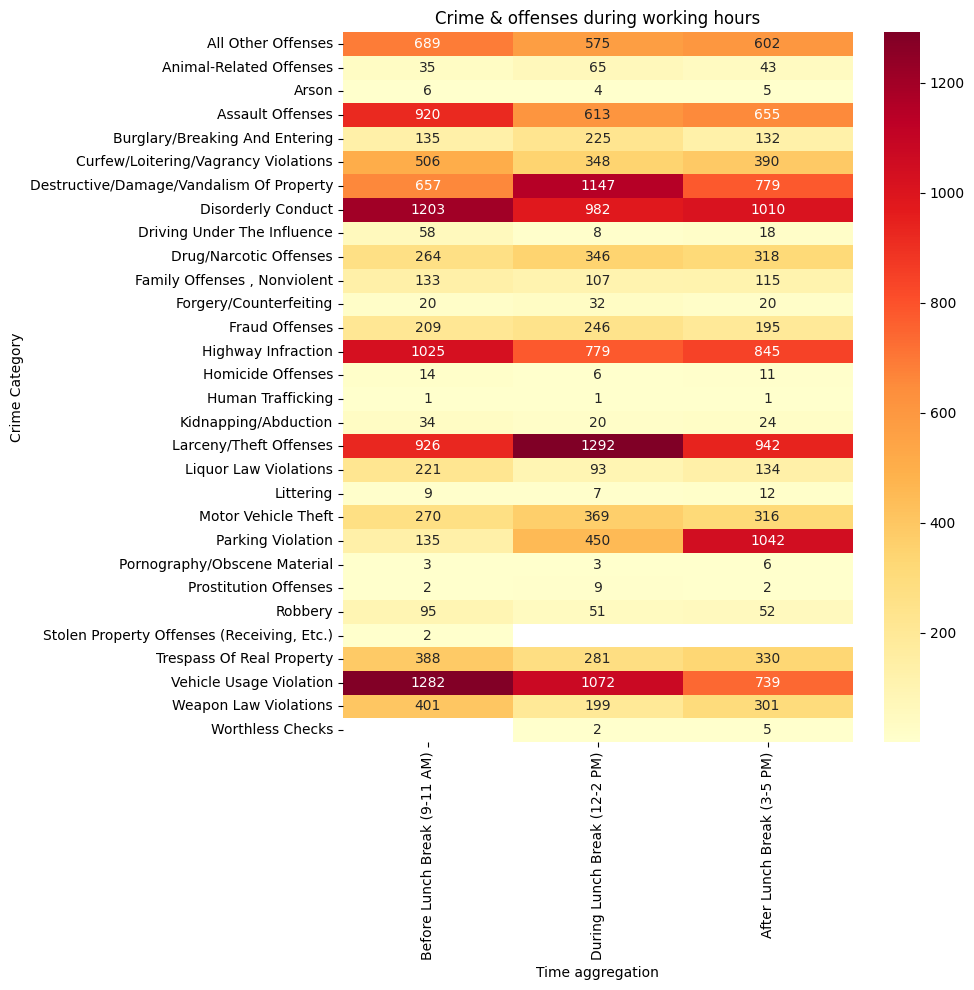

In [ ]:
order = ['Before Lunch Break (9-11 AM)', 'During Lunch Break (12-2 PM)','After Lunch Break (3-5 PM)']

plt.figure(figsize=(10, 10))
sns.heatmap(working_hour_crime_table, cmap='YlOrRd', annot=True, fmt='g', xticklabels=order)

# Customize the plot
plt.title('Crime & offenses during working hours')
plt.xlabel('Time aggregation')
plt.ylabel('Crime Category')

# Adjust spacing between cells
plt.tight_layout()

# Display the plot
plt.show()

What if we group it into our first 70 % crime

In [ ]:
first_70perc_cats = ['Disorderly Conduct', 'Destructive/Damage/Vandalism Of Property', 'Highway Infraction', 'Assault Offenses', 'All Other Offenses', 'Vehicle Usage Violation', 'Larceny/Theft Offenses']

filtered_working_hour_crime = working_hour_crime[working_hour_crime['Category'].isin(first_70perc_cats)]


In [ ]:
filtered_working_hour_crime_table = filtered_working_hour_crime.pivot(index='Category', columns='time_aggregation', values='cases')
filtered_working_hour_crime_table.head()

time_aggregation                          After Lunch Break (3-5 PM)  \
Category                                                               
All Other Offenses                                               689   
Assault Offenses                                                 920   
Destructive/Damage/Vandalism Of Property                         657   
Disorderly Conduct                                              1203   
Highway Infraction                                              1025   

time_aggregation                          Before Lunch Break (9-11 AM)  \
Category                                                                 
All Other Offenses                                                 575   
Assault Offenses                                                   613   
Destructive/Damage/Vandalism Of Property                          1147   
Disorderly Conduct                                                 982   
Highway Infraction                                                 779   

time_aggregation                          During Lunch Break (12-2 PM)  
Category                                                                
All Other Offenses                                                 602  
Assault Offenses                                                   655  
Destructive/Damage/Vandalism Of Property                           779  
Disorderly Conduct                                                1010  
Highway Infraction                                                 845

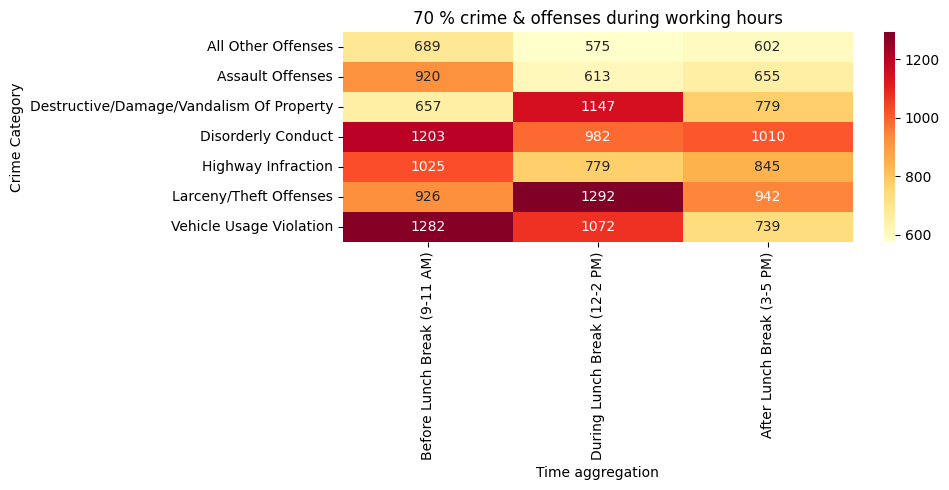

In [ ]:
order = ['Before Lunch Break (9-11 AM)', 'During Lunch Break (12-2 PM)','After Lunch Break (3-5 PM)']

plt.figure(figsize=(10, 5))
sns.heatmap(filtered_working_hour_crime_table, cmap='YlOrRd', annot=True, fmt='g', xticklabels=order)

# Customize the plot
plt.title('70 % crime & offenses during working hours')
plt.xlabel('Time aggregation')
plt.ylabel('Crime Category')

# Adjust spacing between cells
plt.tight_layout()

# Display the plot
plt.show()

## Neighborhood Crime Characteristics


In [ ]:
# Create Variable
neighborhood_crime = offense[['CaseNum', 'Date', 'Time','Neighborhood','Category']].copy()

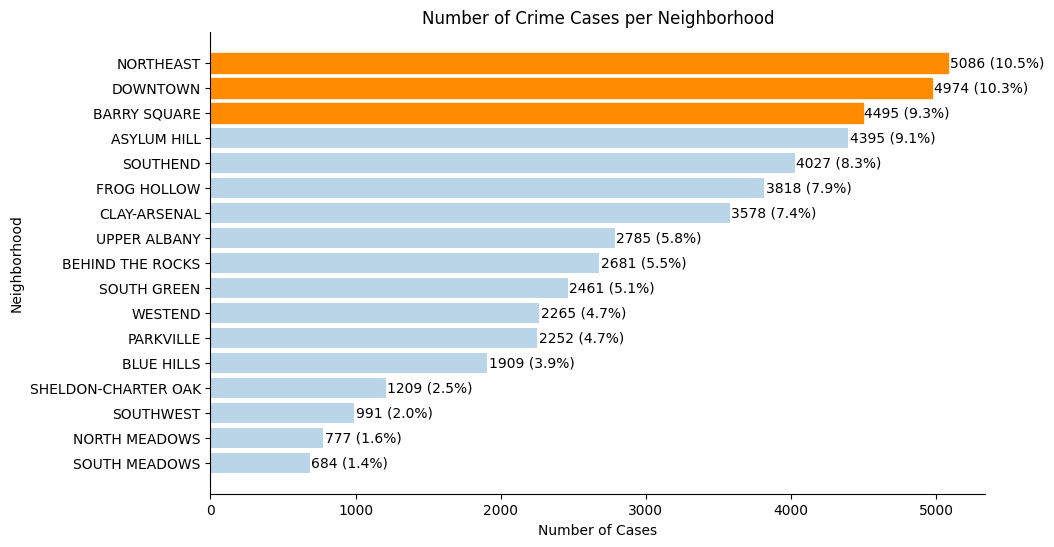

In [ ]:
neighborhood_crime_data = offense.groupby('Neighborhood').agg(cases=('CaseNum', 'count')).sort_values('cases', ascending=True).reset_index()

# Create Barchart and Add annotations for sum and percentage of cases
plt.figure(figsize=(10, 6))
barplot = plt.barh(neighborhood_crime_data['Neighborhood'], neighborhood_crime_data['cases'])
for i, count in enumerate(neighborhood_crime_data['cases']):
    percentage = count / neighborhood_crime_data['cases'].sum() * 100
    plt.text(count + 10, i, f"{count} ({percentage:.1f}%)", va='center')

# Customize the plot
plt.xlabel('Number of Cases')
plt.ylabel('Neighborhood')
plt.title('Number of Crime Cases per Neighborhood')

# Costumize color
for i, bar in enumerate(barplot[-3:]):
    bar.set_color('darkorange')

for bar in barplot[:-3]:
    bar.set_alpha(0.3)

# Remove the top and right spines
sns.despine(top=True, right=True)


plt.show()

In [ ]:
# Groping table
neighborhood_crime_data = offense.groupby('Neighborhood').agg(cases=('CaseNum', 'count')).sort_values('cases', ascending=False).reset_index()
neighborhood_crime_data

Neighborhood  cases
0             NORTHEAST   5086
1              DOWNTOWN   4974
2          BARRY SQUARE   4495
3           ASYLUM HILL   4395
4              SOUTHEND   4027
5           FROG HOLLOW   3818
6          CLAY-ARSENAL   3578
7          UPPER ALBANY   2785
8      BEHIND THE ROCKS   2681
9           SOUTH GREEN   2461
10              WESTEND   2265
11            PARKVILLE   2252
12           BLUE HILLS   1909
13  SHELDON-CHARTER OAK   1209
14            SOUTHWEST    991
15        NORTH MEADOWS    777
16        SOUTH MEADOWS    684

In [ ]:
# add some feature for new variable
neighborhood_crime['hour_digit'] = neighborhood_crime['Time'].map(lambda x: int(str(x)[:2]))
neighborhood_crime['time_aggregation'] = neighborhood_crime['hour_digit'].apply(get_time_label)

In [ ]:
# groupby
neighborhood_crime_top_agg = neighborhood_crime.groupby('Neighborhood')['Category','time_aggregation'].value_counts()

In [ ]:
neighborhood_crime_top_agg = neighborhood_crime_top_agg.reset_index()

In [ ]:
neighborhood_crime_top_agg.rename(columns={0: 'Cases'}, inplace=True)

In [ ]:
# Group the DataFrame by 'Neighborhood'
grouped_neighborhood = neighborhood_crime_top_agg.groupby('Neighborhood')

# Initialize an empty DataFrame to store the results
top_categories_df = pd.DataFrame(columns=['Neighborhood', 'Category', 'time_aggregation', 'Cases'])

# Iterate over each group
for neighborhood, group_df in grouped_neighborhood:
    # Sort the group by 'Cases' column in descending order
    sorted_group = group_df.sort_values('Cases', ascending=False)

    # Retrieve the top 3 categories with the highest cases
    top_categories = sorted_group.head(3)

    # Check if there are any duplicate time_aggregation values
    if top_categories['time_aggregation'].nunique() != len(top_categories):
        # Get the category with the highest cases
        highest_cases_category = top_categories.loc[top_categories['Cases'].idxmax(), 'Category']

        # Update the category for rows with duplicate time_aggregation values
        duplicated_time_agg = top_categories['time_aggregation'].duplicated(keep=False)
        top_categories.loc[duplicated_time_agg, 'Category'] = highest_cases_category

    # Append the top categories to the results DataFrame
    top_categories_df = top_categories_df.append(top_categories, ignore_index=True)


In [ ]:
# Group the DataFrame by 'Neighborhood'
grouped_neighborhood = neighborhood_crime_top_agg.groupby('Neighborhood')

# Initialize an empty DataFrame to store the results
top_crimes_df = pd.DataFrame(columns=['Neighborhood', 'Top Crime 1', 'Worried Time 1', 'Top Crime 2', 'Worried Time 2', 'Top Crime 3', 'Worried Time 3'])

# Iterate over each group
for neighborhood, group_df in grouped_neighborhood:
    # Sort the group by 'Cases' column in descending order
    sorted_group = group_df.sort_values('Cases', ascending=False)

    # Retrieve the top 3 categories with the highest cases
    top_categories = sorted_group.head(3)

    # Extract the top categories and worried times
    top_crime_1 = top_categories.iloc[0]['Category']
    worried_time_1 = top_categories.iloc[0]['time_aggregation']
    top_crime_2 = top_categories.iloc[1]['Category']
    worried_time_2 = top_categories.iloc[1]['time_aggregation']
    top_crime_3 = top_categories.iloc[2]['Category']
    worried_time_3 = top_categories.iloc[2]['time_aggregation']

    # Append the results to the DataFrame
    top_crimes_df = top_crimes_df.append({
        'Neighborhood': neighborhood,
        'Top Crime 1': top_crime_1,
        'Worried Time 1': worried_time_1,
        'Top Crime 2': top_crime_2,
        'Worried Time 2': worried_time_2,
        'Top Crime 3': top_crime_3,
        'Worried Time 3': worried_time_3
    }, ignore_index=True)


In [ ]:
top_crimes_df

Neighborhood                               Top Crime 1  \
0           ASYLUM HILL                         Parking Violation   
1          BARRY SQUARE                        Disorderly Conduct   
2      BEHIND THE ROCKS                        Disorderly Conduct   
3            BLUE HILLS                   Vehicle Usage Violation   
4          CLAY-ARSENAL                   Vehicle Usage Violation   
5              DOWNTOWN                        All Other Offenses   
6           FROG HOLLOW                        Disorderly Conduct   
7         NORTH MEADOWS                    Larceny/Theft Offenses   
8             NORTHEAST                   Vehicle Usage Violation   
9             PARKVILLE                    Larceny/Theft Offenses   
10  SHELDON-CHARTER OAK  Destructive/Damage/Vandalism Of Property   
11          SOUTH GREEN                        Disorderly Conduct   
12        SOUTH MEADOWS                    Larceny/Theft Offenses   
13             SOUTHEND  Destructive/Damage/Vandalism Of Property   
14            SOUTHWEST  Destructive/Damage/Vandalism Of Property   
15         UPPER ALBANY                   Vehicle Usage Violation   
16              WESTEND  Destructive/Damage/Vandalism Of Property   

                    Worried Time 1                               Top Crime 2  \
0     During Lunch Break (12-2 PM)                    Larceny/Theft Offenses   
1       After Lunch Break (3-5 PM)                        Highway Infraction   
2       After Lunch Break (3-5 PM)                    Larceny/Theft Offenses   
3       After Lunch Break (3-5 PM)                    Larceny/Theft Offenses   
4       After Lunch Break (3-5 PM)                   Vehicle Usage Violation   
5         Evening Commute (6-8 PM)                        All Other Offenses   
6       After Lunch Break (3-5 PM)                   Vehicle Usage Violation   
7     Before Lunch Break (9-11 AM)                    Larceny/Theft Offenses   
8       After Lunch Break (3-5 PM)                        Highway Infraction   
9     Before Lunch Break (9-11 AM)                        Disorderly Conduct   
10    Before Lunch Break (9-11 AM)                    Larceny/Theft Offenses   
11      After Lunch Break (3-5 PM)                          Assault Offenses   
12    Before Lunch Break (9-11 AM)                    Larceny/Theft Offenses   
13  Early Morning Commute (6-8 AM)  Destructive/Damage/Vandalism Of Property   
14  Early Morning Commute (6-8 AM)                    Larceny/Theft Offenses   
15    Before Lunch Break (9-11 AM)                   Vehicle Usage Violation   
16    Before Lunch Break (9-11 AM)                    Larceny/Theft Offenses   

                    Worried Time 2                               Top Crime 3  \
0     Before Lunch Break (9-11 AM)  Destructive/Damage/Vandalism Of Property   
1         Evening Commute (6-8 PM)                   Vehicle Usage Violation   
2       After Lunch Break (3-5 PM)                        Disorderly Conduct   
3     Before Lunch Break (9-11 AM)  Destructive/Damage/Vandalism Of Property   
4     Before Lunch Break (9-11 AM)                   Vehicle Usage Violation   
5     During Lunch Break (12-2 PM)                        All Other Offenses   
6       After Lunch Break (3-5 PM)                   Vehicle Usage Violation   
7     During Lunch Break (12-2 PM)  Destructive/Damage/Vandalism Of Property   
8         Evening Commute (6-8 PM)                   Vehicle Usage Violation   
9         Evening Commute (6-8 PM)                    Larceny/Theft Offenses   
10    Before Lunch Break (9-11 AM)                        Disorderly Conduct   
11      After Lunch Break (3-5 PM)                         Parking Violation   
12  Early Morning Commute (6-8 AM)                    Larceny/Theft Offenses   
13    Before Lunch Break (9-11 AM)                   Vehicle Usage Violation   
14    Before Lunch Break (9-11 AM)                    Larceny/Theft Offenses   
15        Evening Commute (6-8 PM)             